<h1><b>MACHINE LEARNING PROJECT - II</b></h1>

<h2><b><i>Rainfall Prediction Using Different Machine Learning Models</i></b></h2>

<p>The goal of this project is to use five different machine learning models (LOGISTIC REGRESSION, DECISION TREE, RANDOM FOREST, GRADIENT BOOSTING and SUPPORT VECTOR) to predict whether it will rain or not. There are 11 independent variables that are used for the prediction of the rainfall namely -- day, pressure, maxtemp, temperature, mintemp, dewpoint, humidity, cloud, sunshine, winddirection and windspeed and a dependent (target) variable named rainfall. This dataset has been downloaded from a site (link is provided) and imported as pandas dataframe.</p>
<p>The data set has been splitted in to training set and test set. The training set is used for training the model. After the models are fitted on the training set, they are evaluated on the basis of their accuracy, precision, recall, f1 and ROC-AUC score.</p>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [2]:
# Loading the dataset
rainfall_dataset = pd.read_csv('Rainfall.csv')

<br>

## <u>Exploratory Data Analysis (EDA)</u>

In [3]:
# Printing shape and head of the dataset
print(rainfall_dataset.shape, '\n')
rainfall_dataset.head(7)

(366, 12) 



,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5


<p>Checking the size and shape of the dataframe. There are 366 rows (training examples) and 12 columns with 1 being the output response/target variable (rainfall prediction). The remaining 11 columns are other 11 input features used for predicting the response variable. The 11 features are:
<ul>
    <li><b>Day:</b> The specific day of the month (ranging from 1 to 31).</li>
    <li><b>Pressure:</b> The atmospheric pressure, usually measured in hPa (hectopascals).</li>
    <li><b>Maxtemp:</b> The maximum temperature recorded during the day.</li>
    <li><b>Temperature:</b> The average temperature of the day.</li>
    <li><b>Mintemp:</b> The minimum temperature recorded during the day.</li>
    <li><b>Dewpoint:</b> The temperature at which air becomes saturated with moisture and dew forms.</li>
    <li><b>Humidity:</b> The amount of moisture in the air, expressed as a percentage. </li>
    <li><b>Cloud:</b> Cloud cover, likely measured as a percentage or on a scale.</li>
    <li><b>Sunshine:</b> The amount of sunshine received during the day, typically measured in hours.</li>
    <li><b>Winddirection:</b> The direction from which the wind is blowing, usually given in degrees (e.g., 0° for north).</li>
    <li><b>Windspeed:</b> The speed of the wind, typically measured in kilometers per hour (km/h) or meters per second (m/s).</li>
    <li><b>Rainfall:</b> Target variable indicating whether or not it rained. This is a binary classification problem where prediction is made based on the other features.</li>
</ul></p>

In [4]:
# Printing basic statistics of the dataset
rainfall_dataset.describe()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


-> From here, we can conclude following information:
1) <b>'day'</b> is an <b>ordinal</b> variable having value from 1 to 31. It doesn't have any missing values.
2) All the other features are <b>numerical continuous</b> variables and have no missing values except <b>'winddirection' </b> and <b>'windspeed'</b> which have 1 missing value each.

In [5]:
# Printing information of the dataset
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temperature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


-> From here, we can conclude the following information:
1) Only <b>'winddirection'</b> and <b>'windspeed'</b> have 1 missing value each and all the other features have no missing values.
2) <b>'day'</b>, <b>'humidity'</b> and <b>'cloud'</b> have int datatype. All other features have float datatype with the target variable <b>'rainfall'</b> being object in nature.
3) So, the target variable <b>'rainfall'</b> is non-numerical categorical variable.

- <i> Now to gain some more insight in the dataset, I'll perform some steps to not as well get the deeper insight but also to get clearer picture of the dataset and its abnormalities.</i>

### 1) Visualizing Missing Values

In [6]:
# Checking for the missing values in the dataset
rainfall_dataset.isnull().sum()

day              0
pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

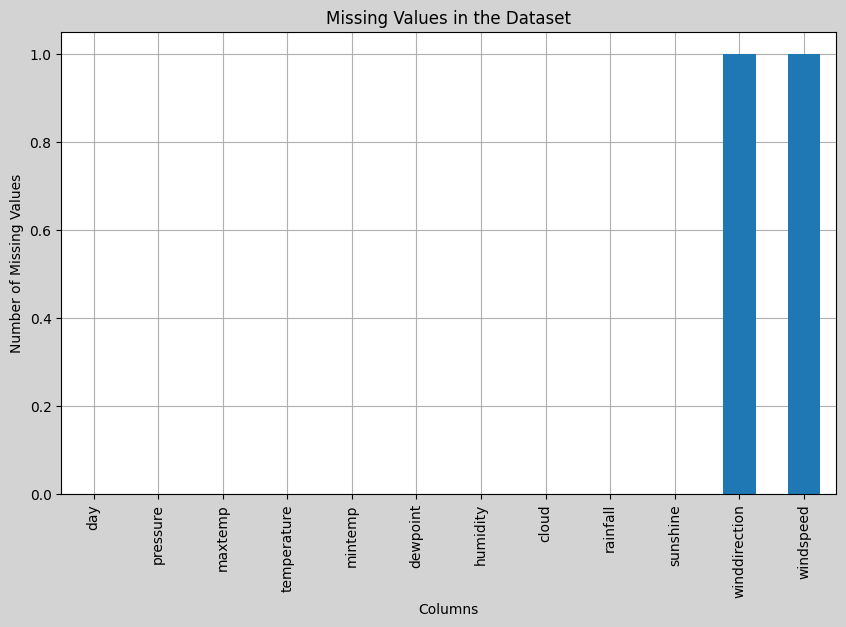

In [7]:
# Plotting the missing values on the bar plot
plt.figure(figsize=(10, 6), facecolor='lightgray')
rainfall_dataset.isnull().sum().plot(kind='bar', zorder=2)
plt.title('Missing Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

-> So, only 'winddirection' and 'windspeed' have missing values and count of missing value is 1 for each feature. All other features doesnot have any missing values.

### 2) Visualizing Numerical Variables 

In [8]:
# Separating the numerical features from the dataset
numerical_features = rainfall_dataset.drop(['rainfall', 'day'], axis=1)  # Since all the features other than 'rainfall' are numerical in nature and day is categorical numerical.
numerical_features.columns

Index(['pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [9]:
# Printing the skewness of numerical features 
numerical_features.skew().sort_values(ascending=True)

cloud           -1.078022
humidity        -1.056007
dewpoint        -1.049658
mintemp         -0.713013
temperature     -0.633029
maxtemp         -0.531390
pressure         0.329616
sunshine         0.360109
windspeed        0.778895
winddirection    0.805962
dtype: float64

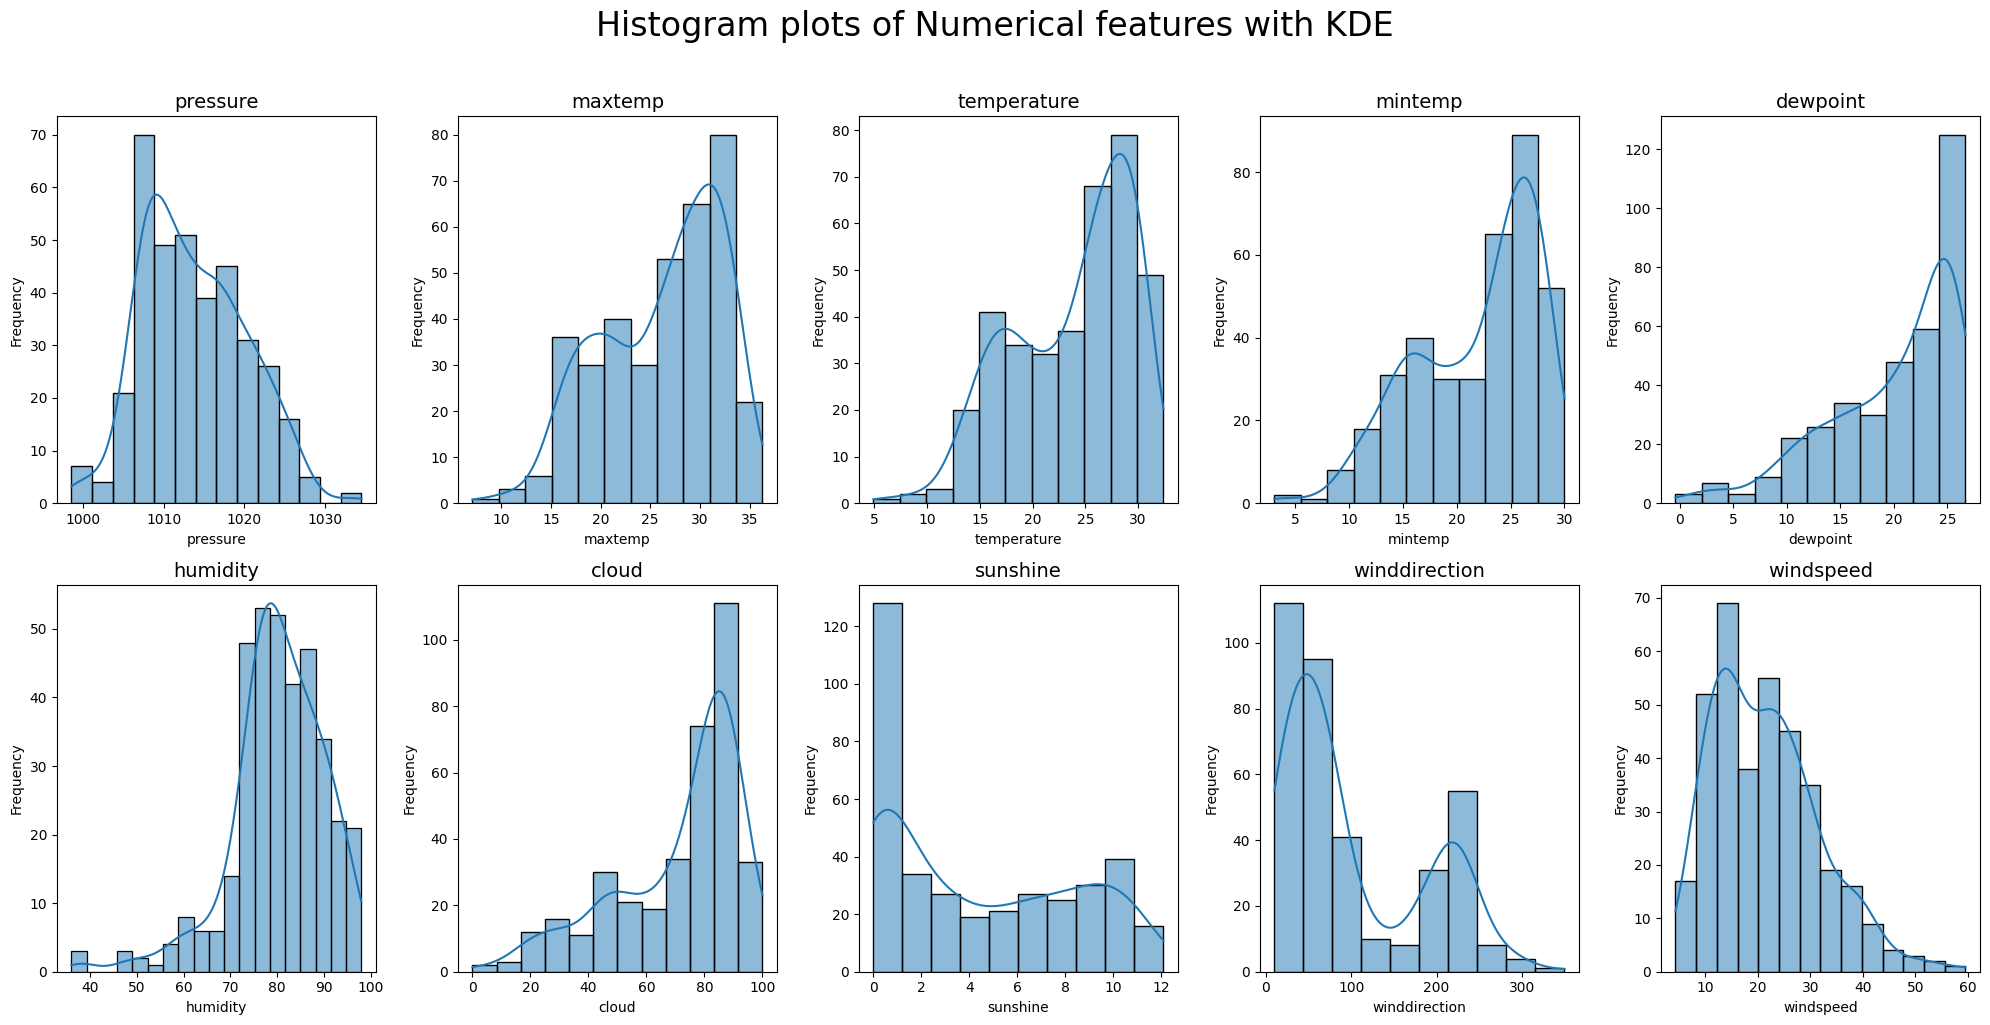

In [10]:
# Plotting the hist plot with kde for all the numerical features using subplot
# Set up the matplotlib figure with a grid of subplots (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each feature's histogram with KDE
for idx, column in enumerate(numerical_features.columns):
    sns.histplot(numerical_features[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'{column}', fontsize=14)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.suptitle('Histogram plots of Numerical features with KDE', y=1.02, fontsize=24)
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


-> So almost all the numerical features are <b>skewed</b> (either left or right) and no numerical feature has <b>normal distribution</b>. So most of the data in the dataset is not symmetrically distributed.

### 3) Visualizing Categorical Variables 

In [11]:
# Separating the categorical features from the dataset
categorical_features = rainfall_dataset[['day', 'rainfall']]
categorical_features.columns
# Since there are only these two categorical features in the dataset as seen from above.

Index(['day', 'rainfall'], dtype='object')

In [12]:
# Printing the categories of each categorical feature
for column in categorical_features.columns:
    print(f'{column}: {categorical_features[column].nunique()}: {categorical_features[column].unique()}')

day: 31: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
rainfall: 2: ['yes' 'no']


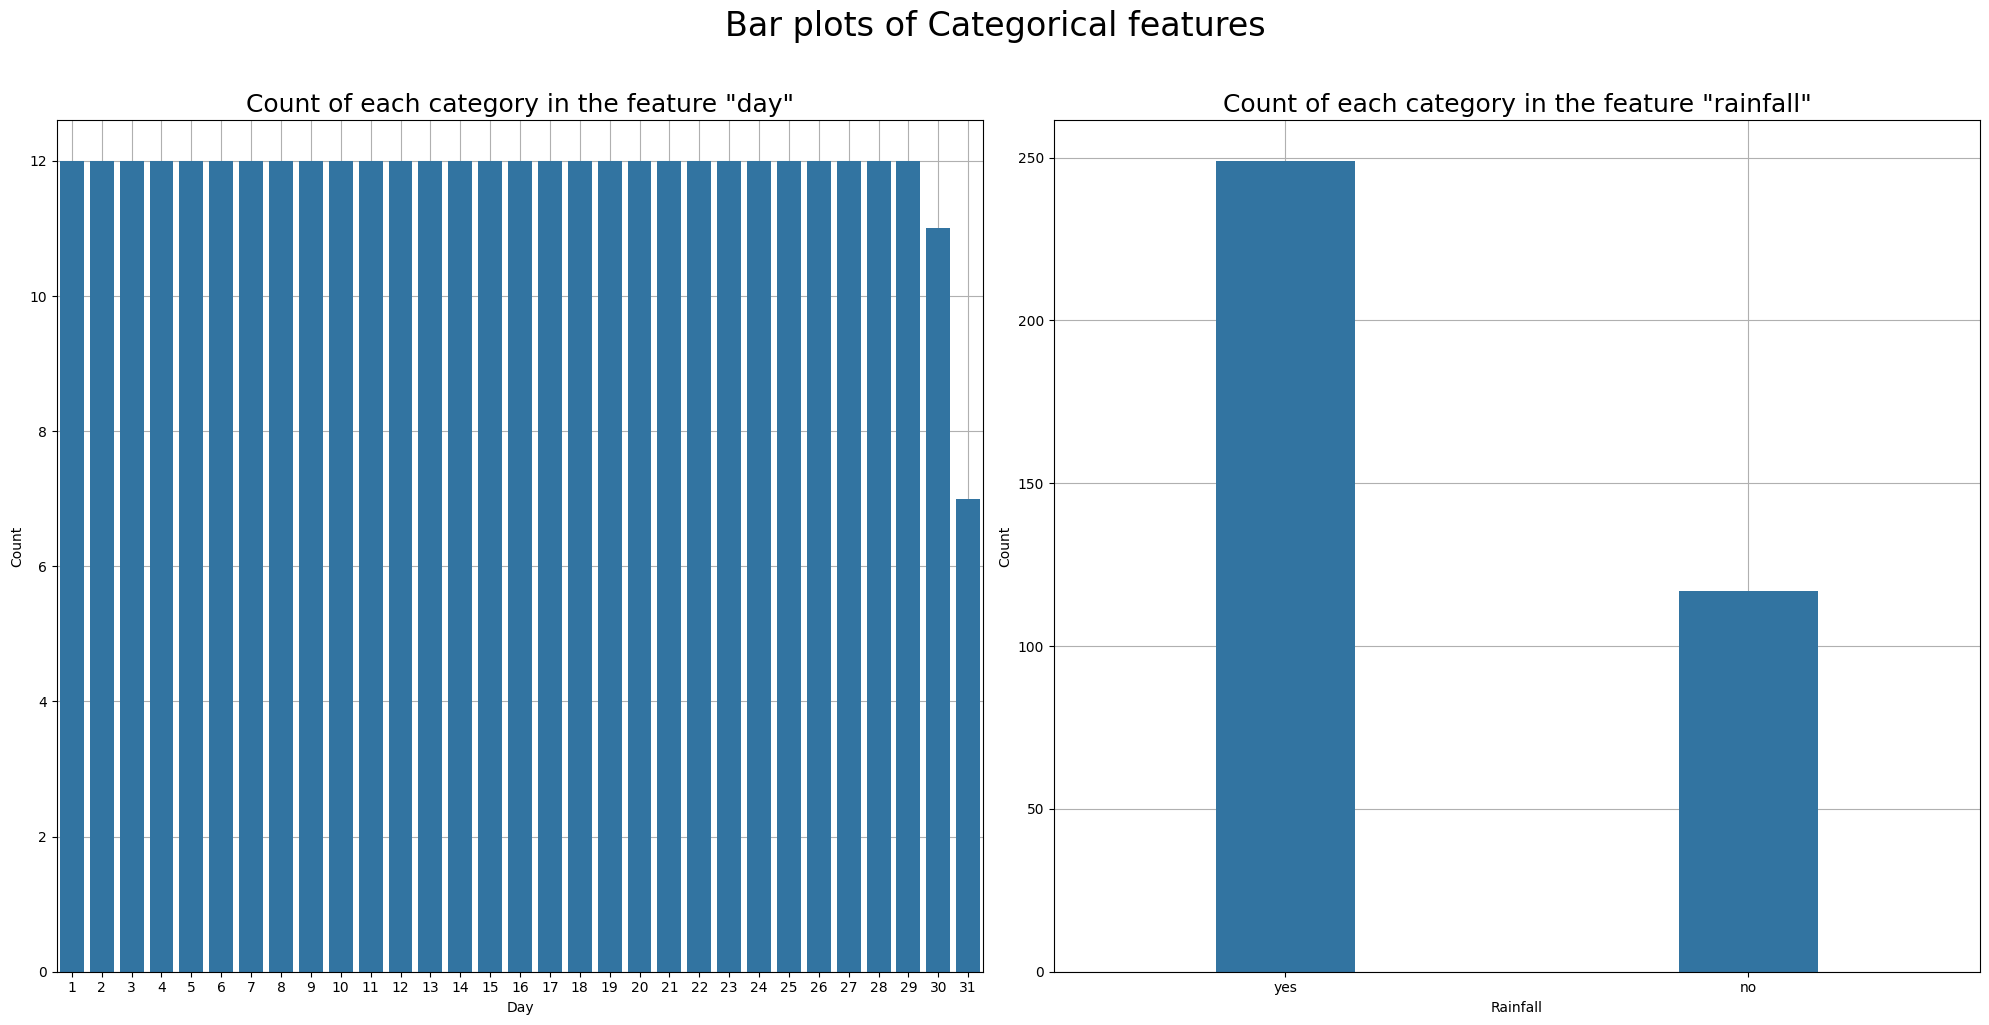

In [13]:
# Plotting bar plots for the categories of each categorical features using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()  

# Plot the bar plot for the categorical feature 'day'
sns.countplot(x='day', data=categorical_features, ax=axes[0], zorder=2)
axes[0].set_title('Count of each category in the feature "day"', fontsize=18)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# Plot the bar plot for the categorical feature 'rainfall'
sns.countplot(x='rainfall', data=categorical_features, ax=axes[1], width=0.3, zorder=2)
axes[1].set_title('Count of each category in the feature "rainfall"', fontsize=18)
axes[1].set_xlabel('Rainfall')
axes[1].set_ylabel('Count')
axes[1].grid(True)

# Show the plot
plt.suptitle('Bar plots of Categorical features', y=1.02, fontsize=24)
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

-> The <b>'day'</b> feature has 31 categories and each feature has 12 occurences except category 30 and 31. Since these are numerical categorical, no need to encode them.
<br>
-> The target variable <b>'rainfall'</b> has 2 categories in which we can see much imbalance. So, we need to balance this class and we need to encode them before training the models.

### 4) Visualizing Outliers in Numerical Features 

In [14]:
# Since the numerical features are already being separated.
numerical_features.columns

Index(['pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

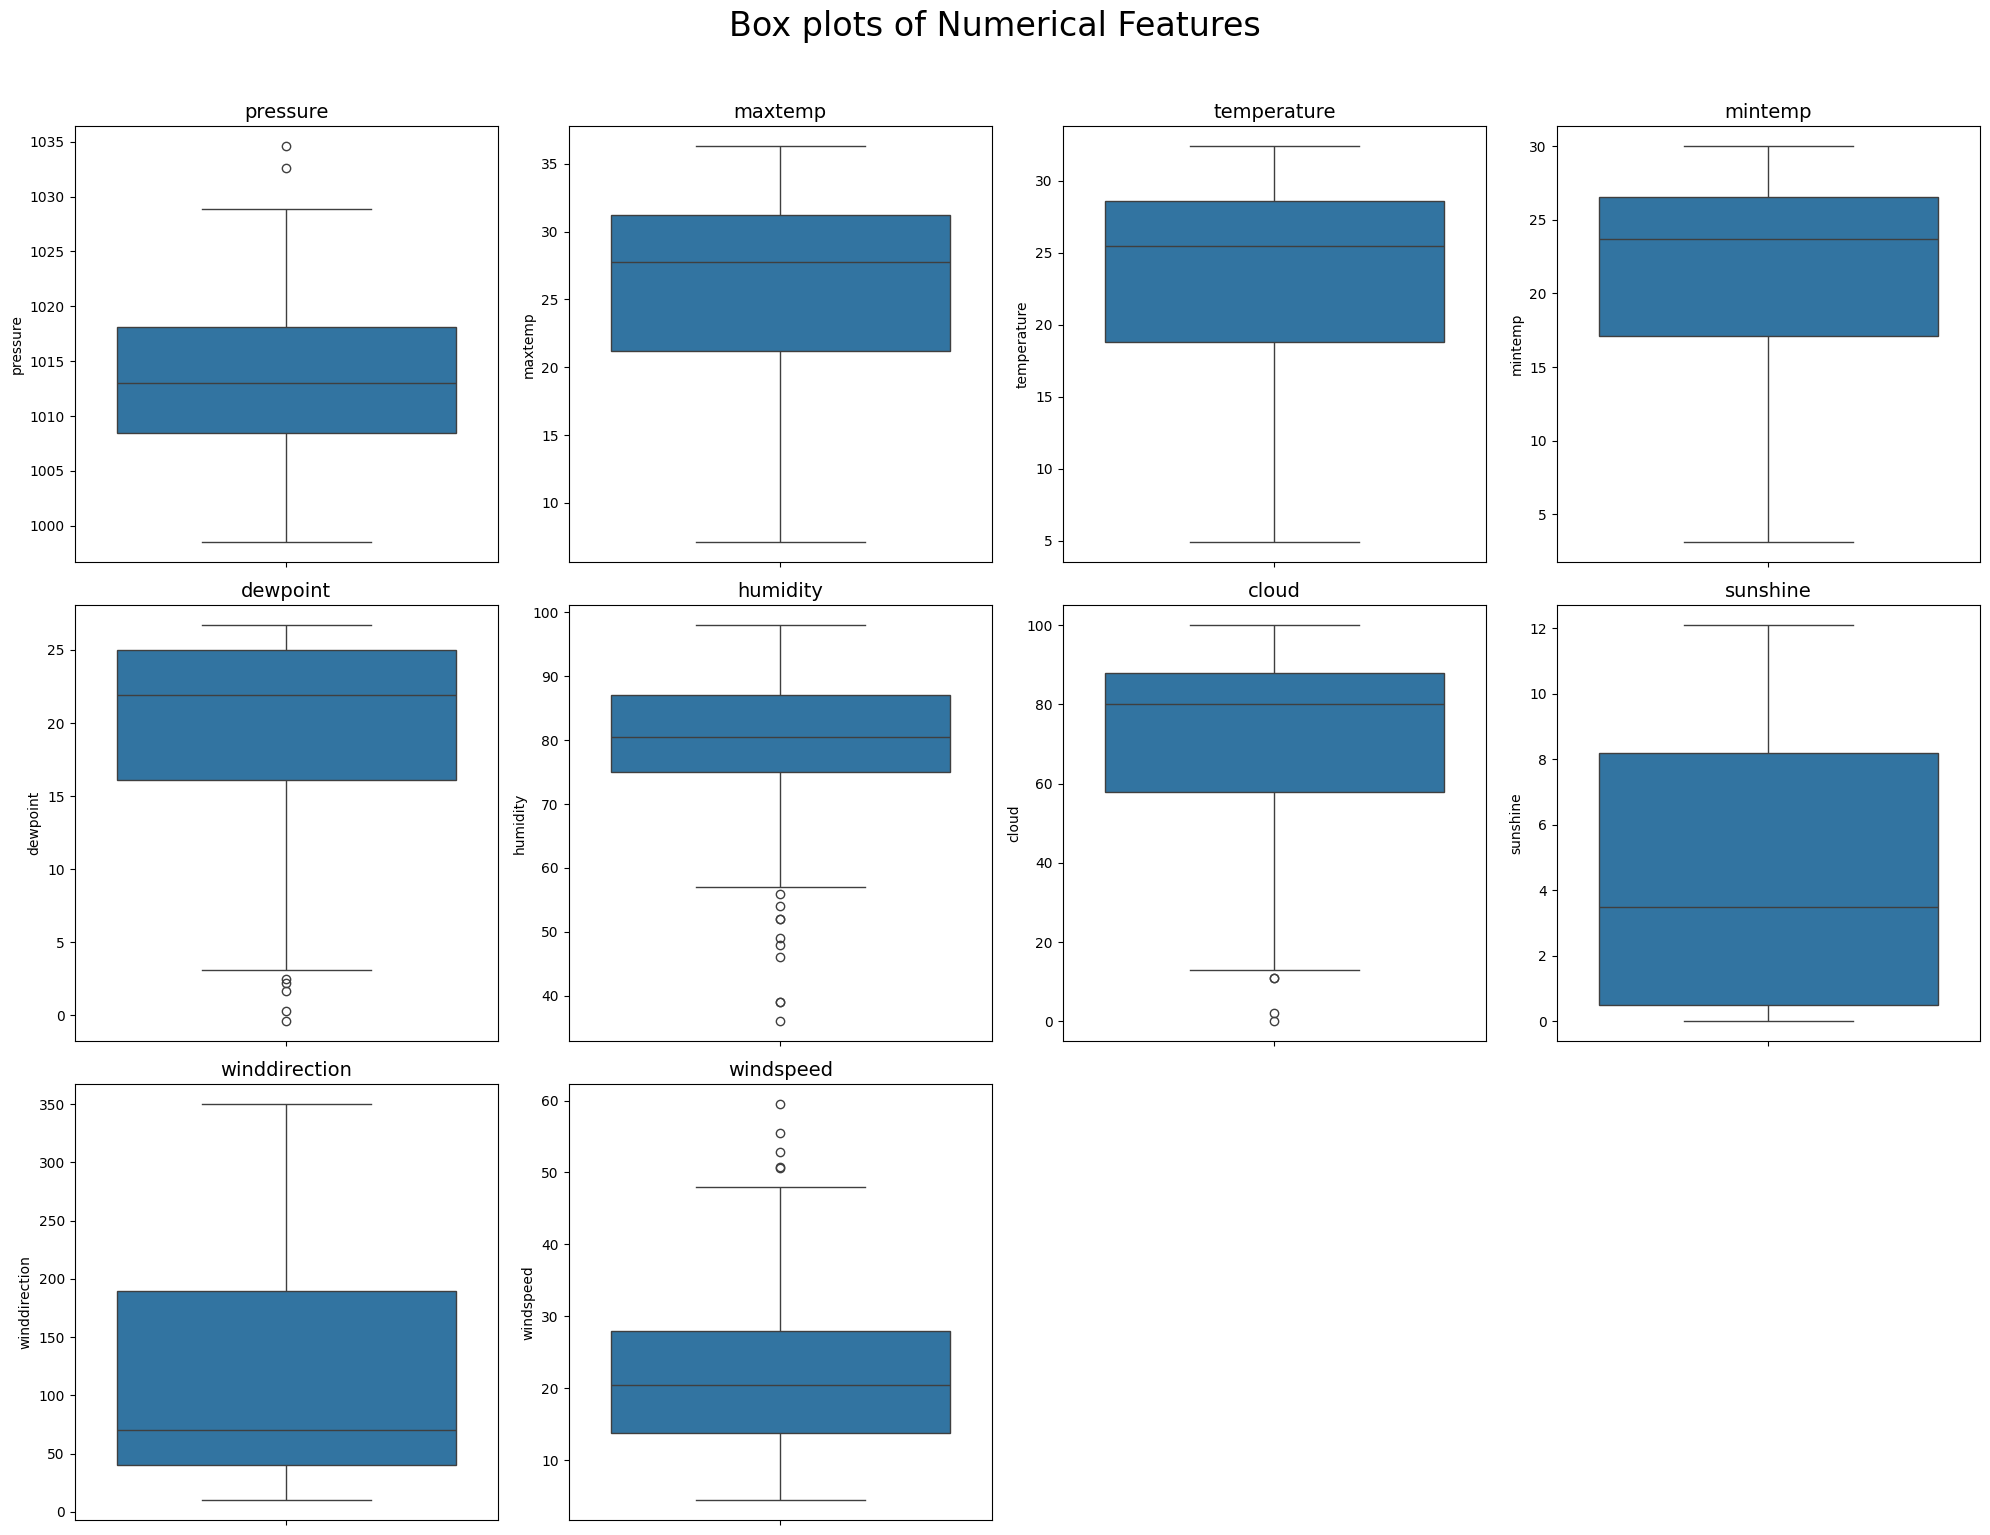

In [15]:
# Plotting box plots of all numerical features using subplots to visualize outliers
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Generating the graphs
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(numerical_features[column], ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=14)

# Removing the unused graphs
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box plots of Numerical Features', y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

-> The graph shows that <b>'pressure'</b>, <b>'cloud'</b> and <b>'windspeed'</b> have few outliers while <b>'humidity'</b> and <b>'dewpoint'</b> have large number of outliers. Other numerical features have no outliers.

### 5) Visualizing Imbalance in Target Variable 

In [16]:
# As seen above, the target variable has 2 categories with certain imbalance between those two classes.
print(f'Rainfall: {rainfall_dataset['rainfall'].nunique()}: {rainfall_dataset['rainfall'].unique()}')
print(f'{rainfall_dataset['rainfall'].value_counts()}')

Rainfall: 2: ['yes' 'no']
rainfall
yes    249
no     117
Name: count, dtype: int64


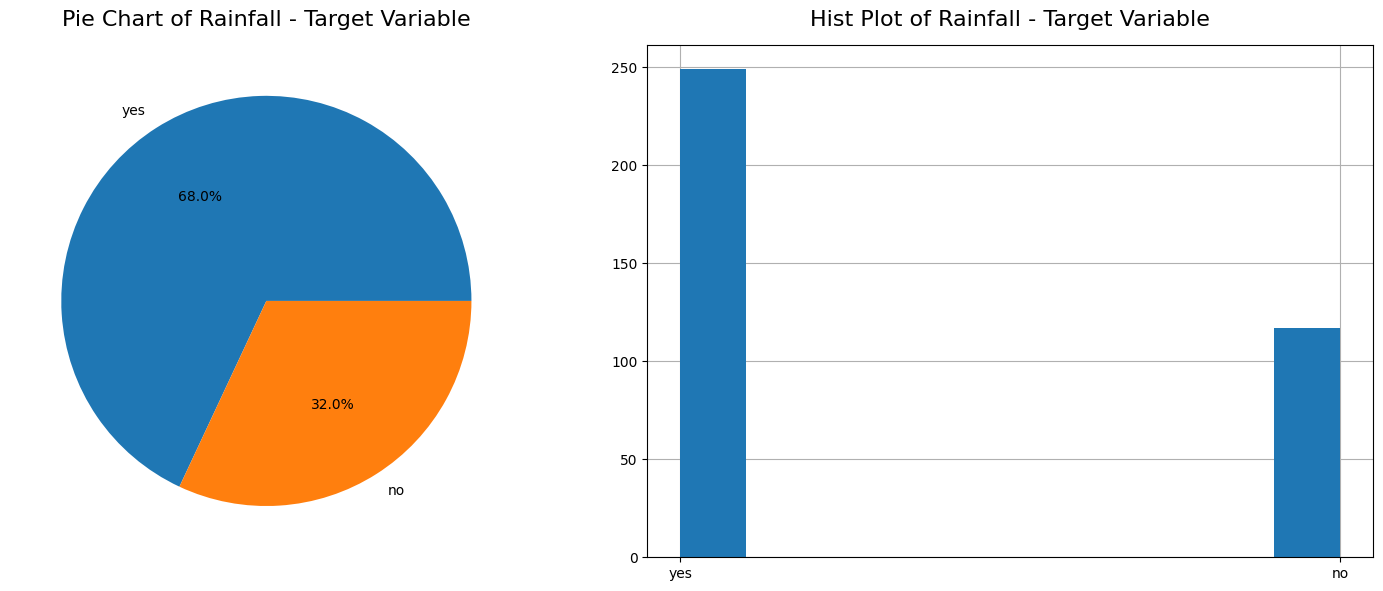

In [17]:
# Visualizing the imbalance in target variable using pie chart and hist plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(rainfall_dataset['rainfall'].value_counts(), labels=rainfall_dataset['rainfall'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Rainfall - Target Variable', y=1.02, fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(rainfall_dataset['rainfall'], zorder=2)
plt.title('Hist Plot of Rainfall - Target Variable', y=1.02, fontsize=16)
plt.grid(True, zorder=1)

plt.tight_layout()
plt.show()


-> From graphs above, it is visible that there is a fair imbalance between the categories of the target variable <b>'rainfall'</b> which can affect the performance of the model.

- <i> It is important that these anamolies in the dataset should be handled before hand so that it won't affect the model's performance and model successfully predicts the outcome, given the input features.</i>

<br>

## <u>Data Preprocessing</u>

-> In this step, data will be cleaned and preprocessed and will be made ready for the model to get trained on the dataset.

### 1) Handling Missing Values

In [18]:
# Imputing the missing values in both features using median value
rainfall_dataset.fillna({'winddirection': rainfall_dataset['winddirection'].median()}, inplace=True)
rainfall_dataset.fillna({'windspeed': rainfall_dataset['windspeed'].median()}, inplace=True)

# Checking the missing values in the dataset after imputing
print('Missing Values in the Dataset:', rainfall_dataset.isnull().sum().sum())

Missing Values in the Dataset: 0


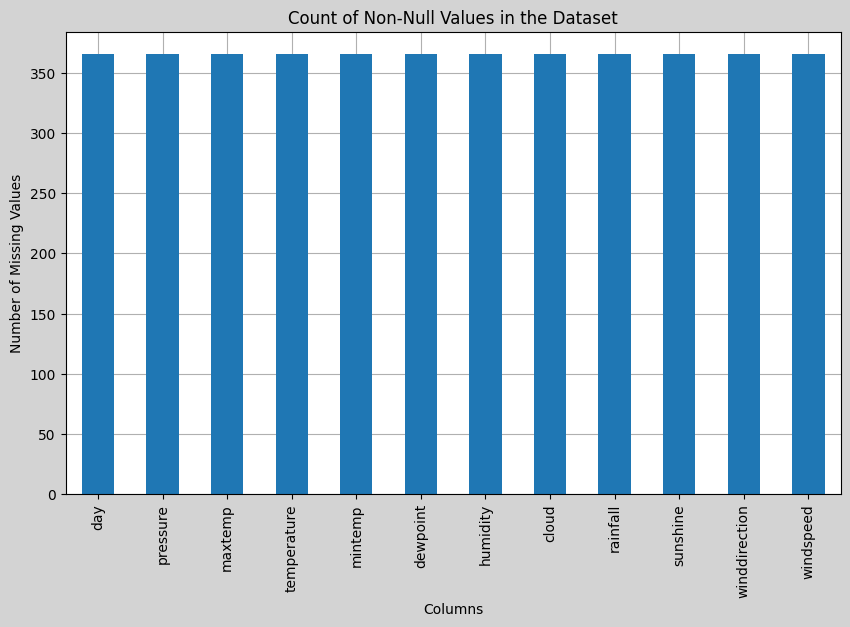

In [19]:
# Plotting the non-null values on the bar plot
plt.figure(figsize=(10, 6), facecolor='lightgray')
rainfall_dataset.count().plot(kind='bar', zorder=2)
plt.title('Count of Non-Null Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

-> All the values have been imputed and now there is not any null value in the dataset. The graph also gives the count of non-null values of each feature in the dataset and they are all the same, equal to the number of rows in the dataset.

### 2) Transforming the Numerical Features

In [20]:
# Using the yeo-johnson transformation method to convert numerical features to normal distributions.
yeojohnson_transformer = PowerTransformer(method='yeo-johnson')

# Applying transformation on each method
for feature in numerical_features.columns:
    rainfall_dataset[feature] = yeojohnson_transformer.fit_transform(rainfall_dataset[[feature]])

In [21]:
# Printing the skewness of the numerical variables
rainfall_dataset[numerical_features.columns].skew().sort_values(ascending=True)

cloud           -0.503672
dewpoint        -0.454229
mintemp         -0.292978
temperature     -0.256277
maxtemp         -0.203456
sunshine        -0.104697
winddirection   -0.030688
windspeed       -0.017604
humidity        -0.009491
pressure         0.000000
dtype: float64

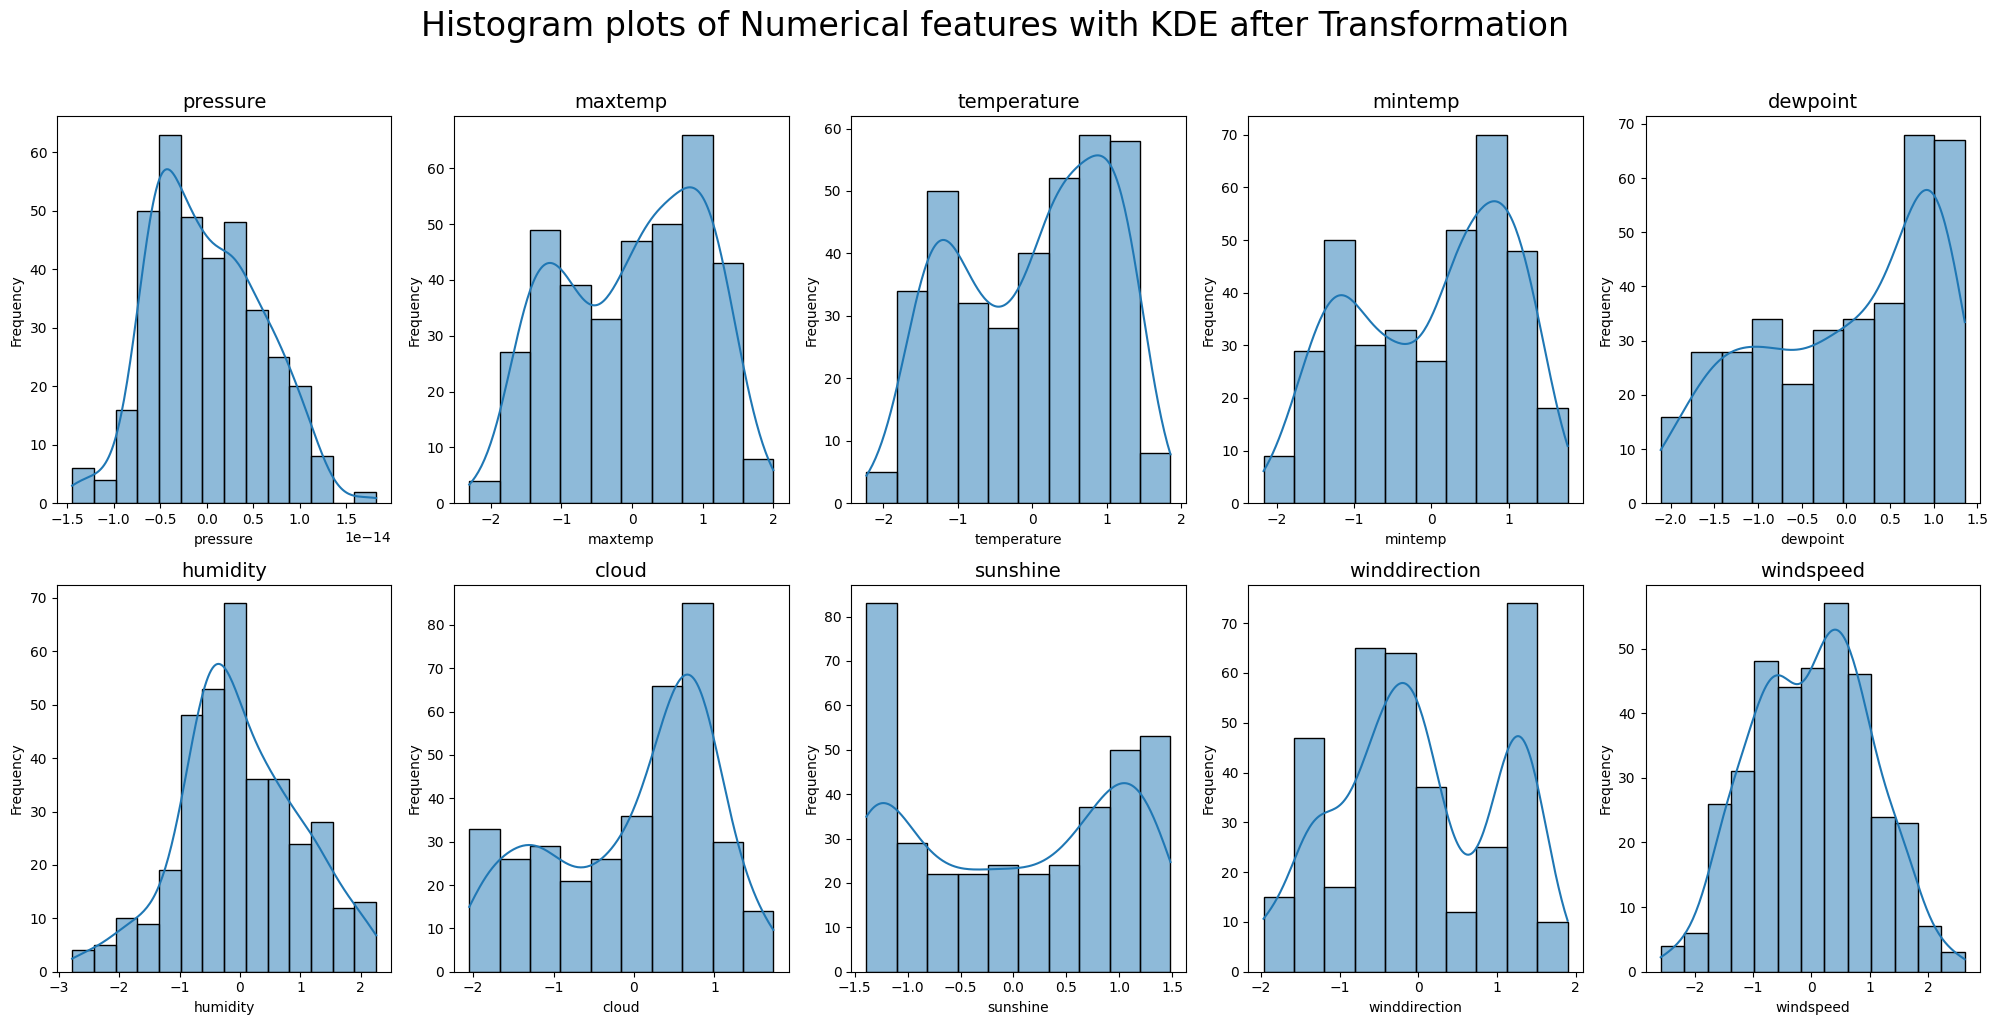

In [22]:
# Plotting the hist plot with kde to visualize the data skewness
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each feature's histogram with KDE
for idx, column in enumerate(numerical_features.columns):
    sns.histplot(rainfall_dataset[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'{column}', fontsize=14)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.suptitle('Histogram plots of Numerical features with KDE after Transformation', y=1.02, fontsize=24)
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


-> Now all the features are more close to normal distribution. According to the data, <b>'dewpoint'</b> and <b>'cloud'</b> are still skewed but not much as compared to before transformation. 

### 3) Standardizing the Numerical Features

In [23]:
# Using Standardization to scale the numerical features
scaler = StandardScaler()

# Applying the standardization on the numerical features
for feature in numerical_features.columns:
    rainfall_dataset[feature] = scaler.fit_transform(rainfall_dataset[[feature]])

In [24]:
# Checking the basic statistic of each numerical feature (specifically mean and std)
rainfall_dataset[numerical_features.columns].describe().round(2) 

,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.47,-2.31,-2.23,-2.17,-2.11,-2.78,-2.05,-1.39,-1.97,-2.58
25%,-0.82,-0.92,-0.97,-0.97,-0.86,-0.65,-0.84,-1.04,-0.66,-0.73
50%,-0.10,0.17,0.20,0.22,0.22,-0.09,0.32,0.09,-0.06,0.07
75%,0.69,0.85,0.89,0.87,0.92,0.67,0.84,0.98,1.12,0.74
max,3.13,2.00,1.86,1.76,1.36,2.25,1.73,1.48,1.90,2.63


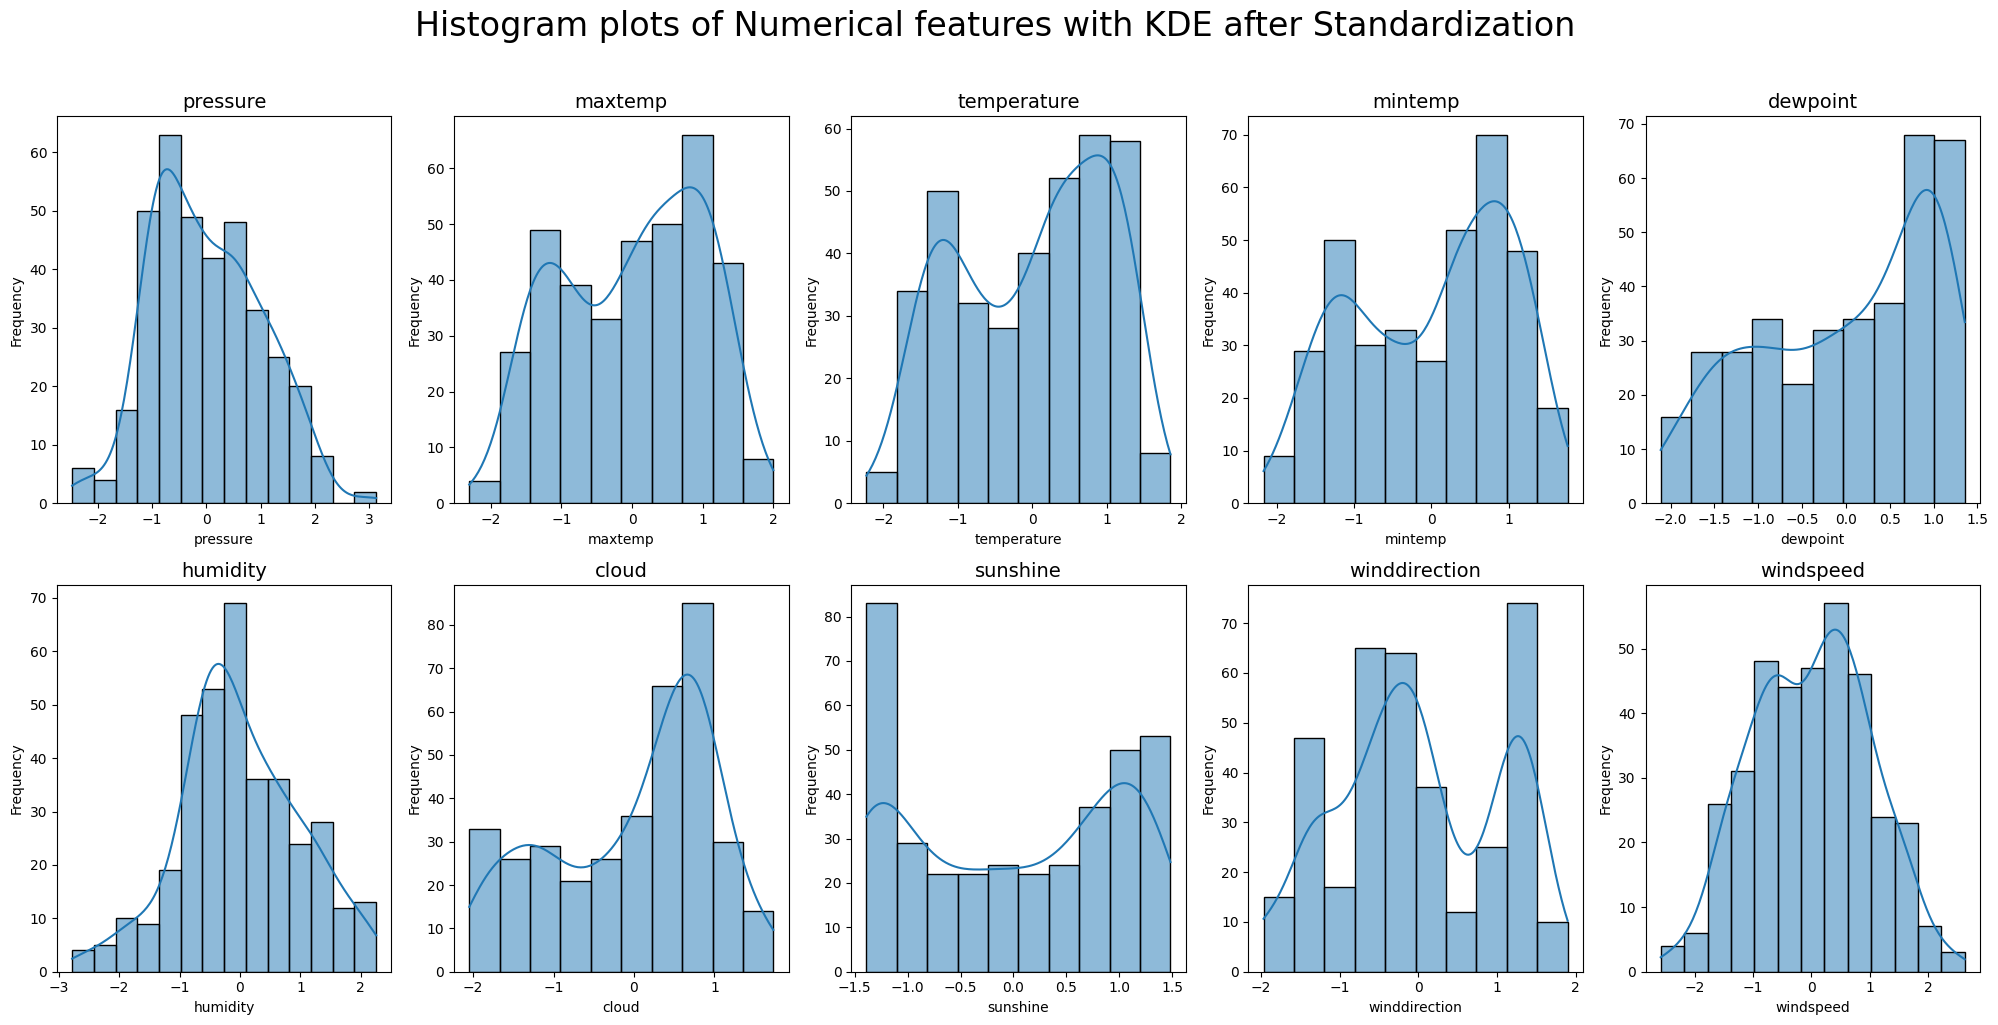

In [25]:
# Plotting the hist plot with kde to visualize the features after scaling
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each feature's histogram with KDE
for idx, column in enumerate(numerical_features.columns):
    sns.histplot(rainfall_dataset[column], kde=True, ax=axes[idx])
    axes[idx].set_title(f'{column}', fontsize=14)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.suptitle('Histogram plots of Numerical features with KDE after Standardization', y=1.02, fontsize=24)
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


-> So now each numerical feature has also been standardized i.e, each feature has mean 0 and standard deviation 1. This will make data less scattered.

### 4) Encoding the Categorical Features

In [26]:
# Since only the target variable 'rainfall' is non-numerical categorical variable, we need to encode only this variable not the 'day' feature.
encoder = LabelEncoder()

# Encoding the target variable 'rainfall'
rainfall_dataset['rainfall'] = encoder.fit_transform(rainfall_dataset['rainfall'])

In [27]:
# Printing the categories of the 'rainfall' variable
print(f'Rainfall: {rainfall_dataset['rainfall'].nunique()}: {rainfall_dataset['rainfall'].unique()}')

Rainfall: 2: [1 0]


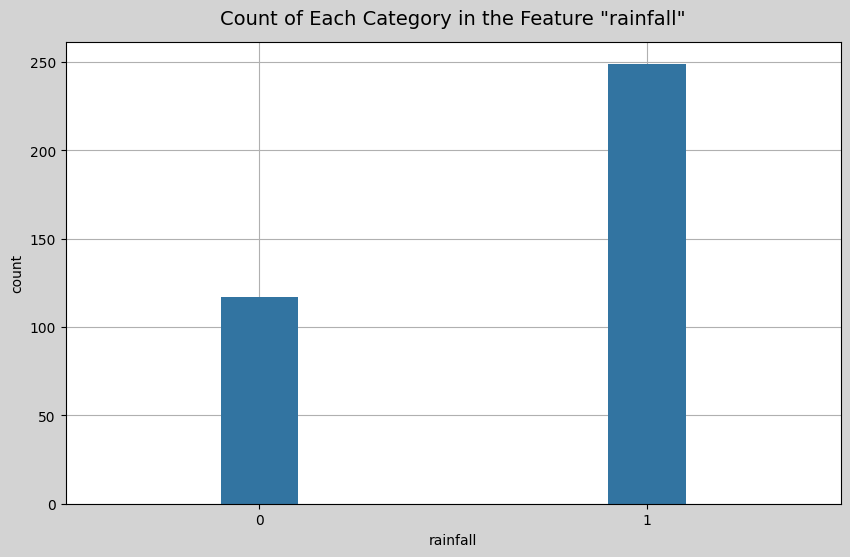

In [28]:
# Plotting the count plot for the encoded categorical variable
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.countplot(x='rainfall', data=rainfall_dataset, zorder=2, width=0.2)
plt.grid(True)
plt.title('Count of Each Category in the Feature "rainfall"', fontsize=14, y=1.02)
plt.show()

In [29]:
# Checking if there any other 'object' feature left
print('Object Features:', rainfall_dataset.select_dtypes('object').columns)

Object Features: Index([], dtype='object')


-> The <b>'rainfall'</b> variable has now been encoded using label encoder and there is no other feature left which has 'object' data type.

### 5) Treating Outliers

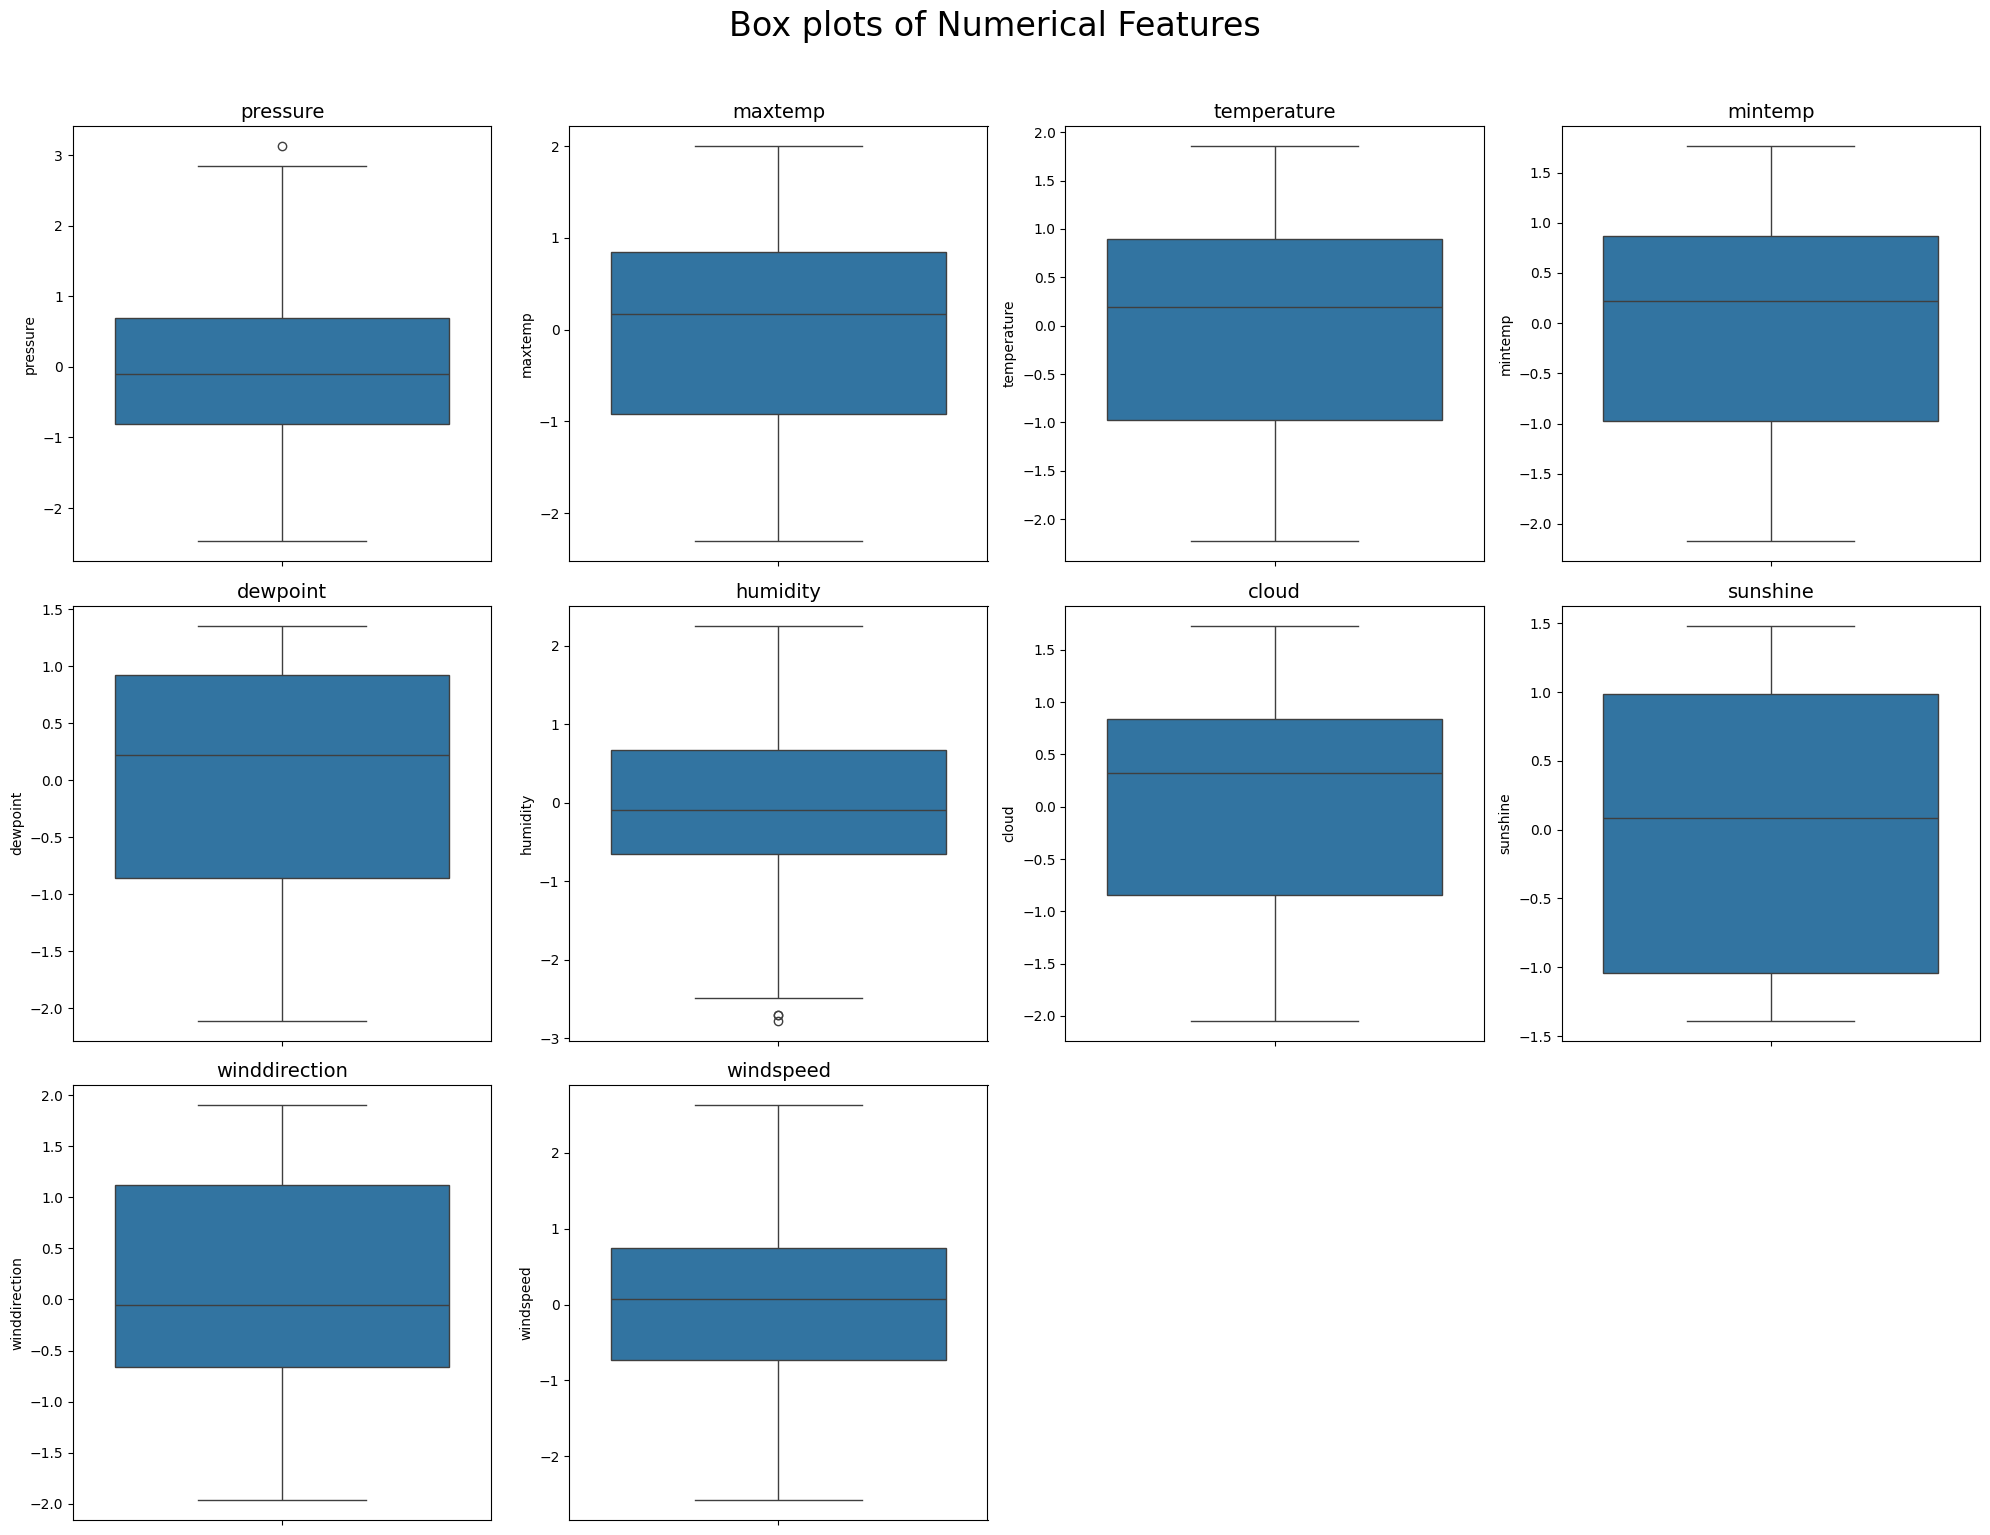

In [30]:
# Since scaling and transforming the features changes the state and data points of numerical feature, we have to see the outliers again.
# Using box plots to visualize the outliers in each numerical feature
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Generating the graphs
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(rainfall_dataset[column], ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=14)

# Removing the unused graphs
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box plots of Numerical Features', y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

-> The number of outliers has been decreased by a large number by performing transformation and standardization of numerical features. But since there are still outlier that should be handled.

In [31]:
# Treating the remaining outliers using IQR method.
Q1 = rainfall_dataset[['pressure', 'humidity']].quantile(0.25)
Q3 = rainfall_dataset[['pressure', 'humidity']].quantile(0.75)
IQR = Q3 - Q1

# Finding the upper and lower limits
upper_limit = Q3 + 1.5*IQR
print('Upper Limit:', upper_limit, '\n')

lower_limit = Q1 - 1.5*IQR
print('Lower Limit:', lower_limit)

Upper Limit: pressure    2.948899
humidity    2.663946
dtype: float64 

Lower Limit: pressure   -3.076233
humidity   -2.644732
dtype: float64


In [32]:
# Since the number of rows in the dataset is very less, we can't remove them. Instead, capping these outliers.
for column in rainfall_dataset[['pressure', 'humidity']].columns:
    rainfall_dataset[column] = np.where(
        rainfall_dataset[column] > upper_limit[column],        # Condition 1
        upper_limit[column],                               # If condition 1 is true
        np.where(                                  # If condition 1 is false
            rainfall_dataset[column] < lower_limit[column],    # Condition 2
            lower_limit[column],                           # If condition 2 is true
            rainfall_dataset[column]                   # If condition 2 is false
        )
    )

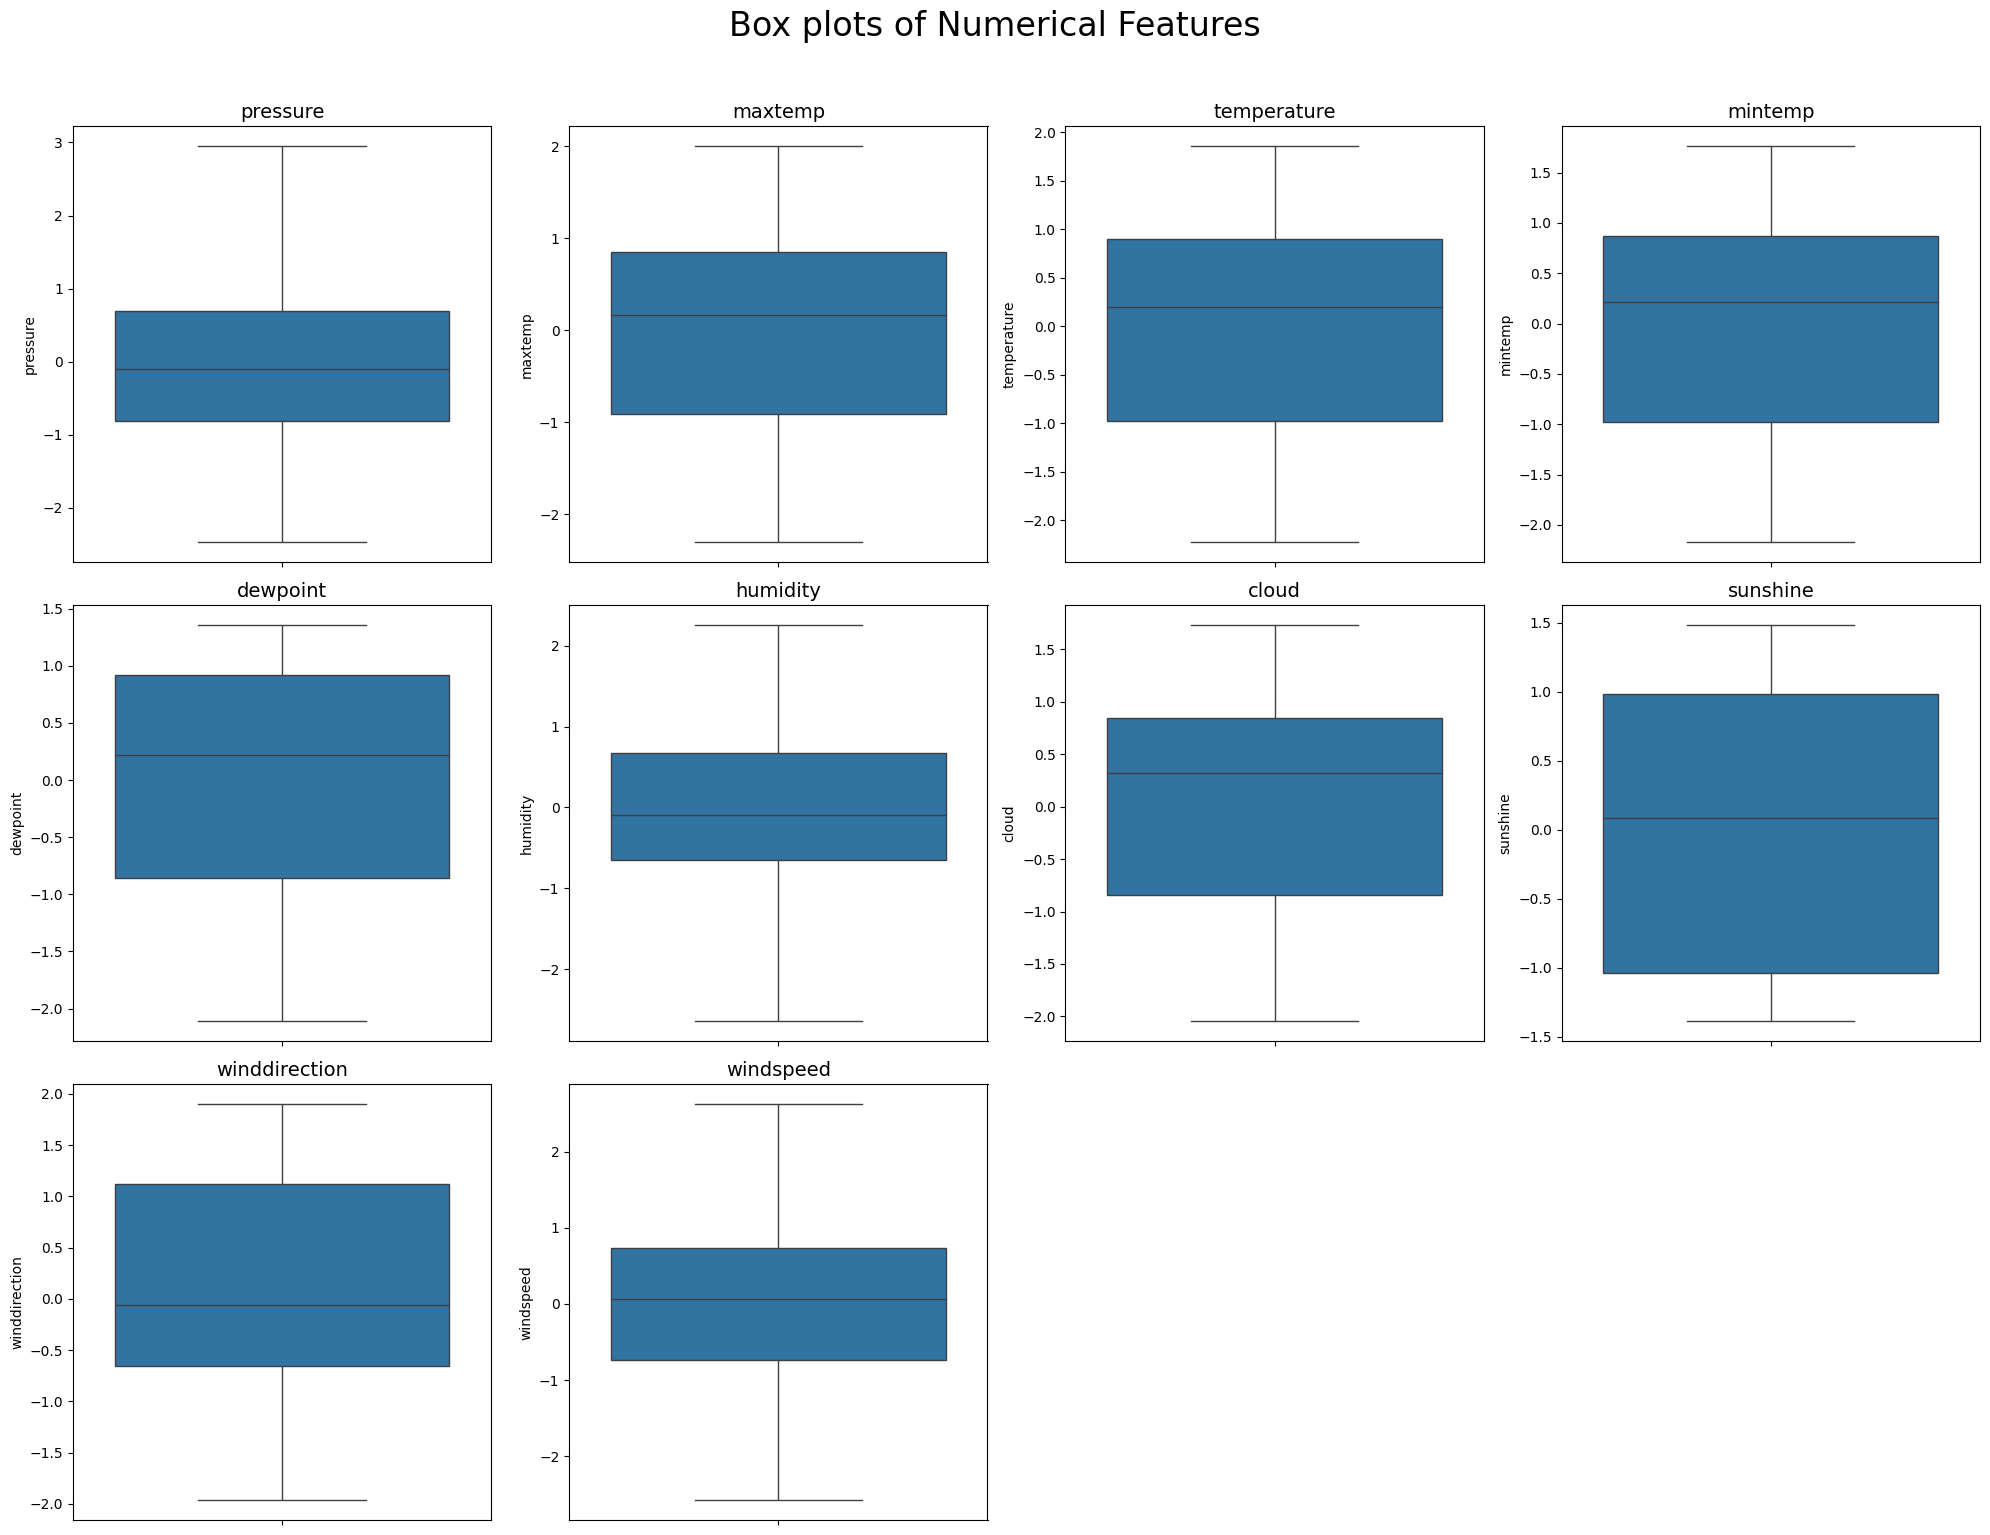

In [33]:
# Plotting the box plots after capping the outliers
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Generating the graphs
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(rainfall_dataset[column], ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=14)

# Removing the unused graphs
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box plots of Numerical Features', y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

-> Now there are no outliers in the numerical features of the dataset and all the outliers have been handled.

### 6) Balancing Target Variable

In [34]:
# Using SMOTE over sampling to balance the imbalance in the target variable
smote = SMOTE()

# Splitting the dataset
X = rainfall_dataset.drop('rainfall', axis=1)
Y = rainfall_dataset['rainfall']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Before Oversampling:',Y_train.value_counts())

# Applying SMOTE on the training data
X_train, Y_train = smote.fit_resample(X_train, Y_train)
print('\nAfter Oversampling:', Y_train.value_counts())

Before Oversampling: rainfall
1    198
0     94
Name: count, dtype: int64

After Oversampling: rainfall
0    198
1    198
Name: count, dtype: int64


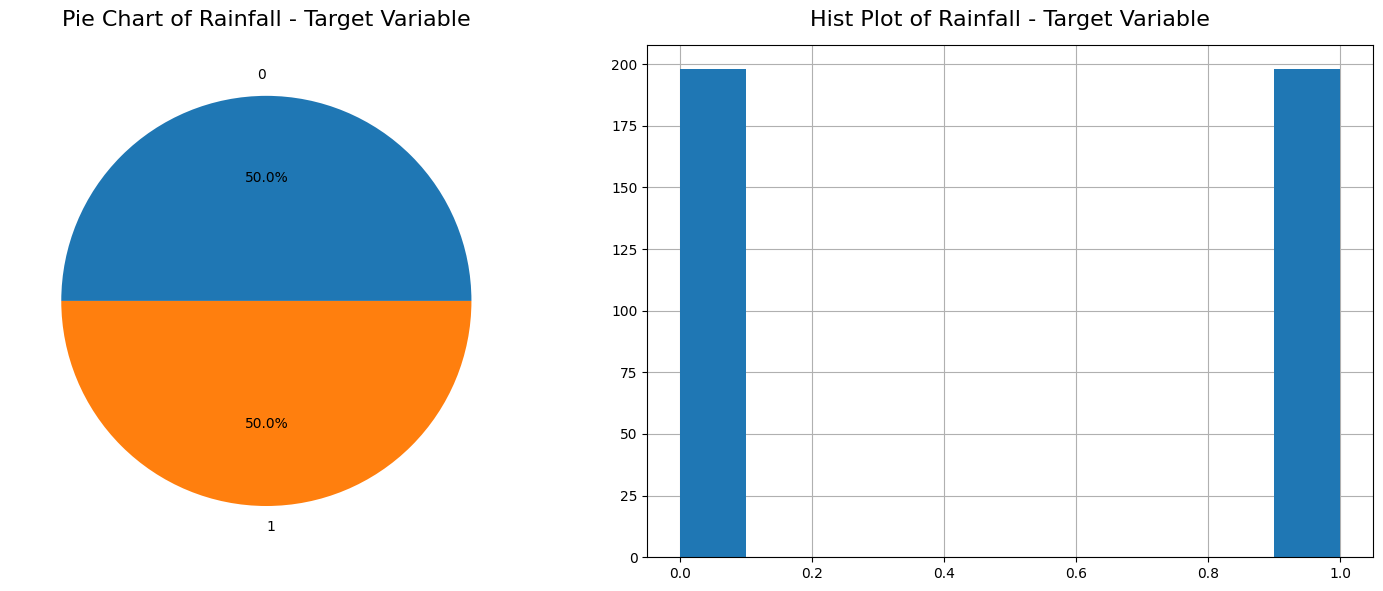

In [35]:
# Visualizing the target variable using pie chart and hist plot after balancing
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(Y_train.value_counts(), labels=Y_train.value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Rainfall - Target Variable', y=1.02, fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(Y_train, zorder=2)
plt.title('Hist Plot of Rainfall - Target Variable', y=1.02, fontsize=16)
plt.grid(True, zorder=1)

plt.tight_layout()
plt.show()


-> Now the training dataset have been equally distributed and have the same ratio of both categories.

### 7) Feature Creation

In [36]:
# Creating some new features that can help in predicting rainfall

# 1. Creating a feature that can represent average of the maximum and minimum temperatures for the day.
rainfall_dataset['avg_temp'] = (rainfall_dataset['maxtemp'] + rainfall_dataset['mintemp']) / 2

# 2. Creating a feature that can show the combined effect of cloud cover and sunshine effect.
rainfall_dataset['cloud_sun_interaction'] = rainfall_dataset['cloud'] * rainfall_dataset['sunshine']

# 3. Creating a feature which can show where the temperature lies within the day's range.
rainfall_dataset['temp_gradient'] = (rainfall_dataset['temperature'] - rainfall_dataset['mintemp']) / (rainfall_dataset['maxtemp'] - rainfall_dataset['mintemp'])

# 4. Creating a feature that can show the interaction between temperature, humidity and pressure.
rainfall_dataset['temp_humidity_press_interaction'] = rainfall_dataset['temperature'] * rainfall_dataset['humidity'] * rainfall_dataset['pressure']

- <b>'avg_temp'</b> feature represents the average of the maximum and minimum temperatures for the day. It gives a general idea of the overall temperature for that day. A higher average temperature might indicate stable weather conditions, while lower or moderate temperatures could suggest potential instability, which can lead to precipitation. <br><br>

- <b>'cloud_sun_interaction'</b> feature combines the cloud cover and sunshine hours. This interaction captures how the amount of sunshine is affected by cloud cover. When cloud cover is high and sunshine is low, the likelihood of rainfall increases. This feature helps capture the inverse relationship between sunshine and cloudiness, where more clouds generally mean less sunshine and potentially higher chances of rain. <br><br>

- <b>'temp_gradient'</b> feature measures the position of the current temperature (temperature) relative to the minimum (mintemp) and maximum (maxtemp) temperatures of the day. It essentially shows where the temperature lies within the day's range. A high temperature gradient (closer to maxtemp) might indicate warmer and potentially drier conditions, while a low gradient (closer to mintemp) could suggest cooler and possibly more humid conditions conducive to rainfall. <br><br>

- <b>'temp_humidity_press_interaction'</b> feature captures the combined effect of temperature, humidity, and atmospheric pressure. Higher <b>temperatures</b> can increase the atmosphere's ability to hold moisture. High <b>humidity</b> indicates a lot of moisture in the air, which is essential for rainfall. Low <b>pressure</b> is often associated with clouds and precipitation. By interacting these three factors, this feature can help identify conditions where all three variables align to make rainfall more likely. For example, moderate to high temperatures combined with high humidity and falling pressure could signal rainfall. <br><br>

-> These features are important because they capture interactions and patterns that might not be evident from the individual features alone. So these features are intergrated in the dataset so that it can be more helpful in predicting rainfall.

In [37]:
# Checking the shape and head of the dataset
print(rainfall_dataset.shape, '\n')
rainfall_dataset.head(9)

(366, 16) 



,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,avg_temp,cloud_sun_interaction,temp_gradient,temp_humidity_press_interaction
0,1,1.867891,-1.098326,-1.050502,-1.021859,-1.279062,-0.927400,-1.197039,1,1.140061,0.092828,0.612771,-1.060093,-1.364698,0.374574,1.819765
1,2,1.283434,-0.843281,-0.963087,-0.962737,-0.936090,-0.038863,0.509009,1,-0.979598,-0.422679,-0.523718,-0.903009,-0.498624,-0.002930,0.048037
2,3,0.936562,-1.043464,-0.903076,-0.839898,-0.477557,1.785654,1.053249,1,-1.389440,-0.657448,-0.668431,-0.941681,-1.463427,0.310356,-1.510281
3,4,0.813018,-0.753602,-0.698392,-0.660922,-0.405556,1.067788,0.842653,1,-0.769472,-0.422679,-0.326419,-0.707262,-0.648398,0.404295,-0.606295
4,5,0.352105,-0.901772,-0.682033,-0.470186,-0.199108,1.785654,0.381595,1,-1.389440,-0.657448,-0.736960,-0.685979,-0.530204,0.490857,-0.428819
5,6,0.798763,-0.437830,-0.649051,-0.644069,-0.547926,0.304603,-1.123250,1,0.909643,-1.344970,-0.628165,-0.540950,-1.021757,-0.024152,-0.157918
6,7,1.254924,-0.887246,-0.977873,-0.992489,-1.024075,-0.254322,-0.924512,0,0.062536,-0.950550,0.172146,-0.939868,-0.057815,0.138880,0.312093
7,8,1.102870,-0.944960,-1.036149,-1.065200,-1.108467,-0.358095,-1.779697,0,0.909643,-0.226084,-0.654940,-1.005080,-1.618889,0.241606,0.409208
8,9,1.074360,-1.230947,-1.078948,-0.977661,-1.122184,-0.358095,0.257619,0,0.036151,-0.056525,1.556470,-1.104304,0.009313,0.399893,0.415096


### 8) Feature Selection

-> Feature Selection is an important step in data preprocessing as it is used to select only the relevant features and remove the unnecessary features. It also involves the process of checking if the newly created features are correlated with target variable. <br><br>
-> To perform feature selection, we'll use <b>correlation matrix</b>, <b>mutual information</b> and <b>Recursive Feature Elimination (RFE)</b> to select the best features and remove the uncessary ones.

- #### <b>Correlation Analysis</b>

In [38]:
# Calculating the correlation matrix of the dataset
corr_matrix = rainfall_dataset.corr()
corr_matrix

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,avg_temp,cloud_sun_interaction,temp_gradient,temp_humidity_press_interaction
day,1.000000,0.042121,-0.001881,0.003443,0.011908,-0.046766,-0.123781,-0.119666,0.010339,0.101218,0.044383,-0.029858,0.005062,-0.088217,0.048586,0.071891
pressure,0.042121,1.000000,-0.826900,-0.849669,-0.833693,-0.865204,-0.218080,0.063536,-0.088515,-0.228511,-0.615443,0.361846,-0.838280,-0.210424,0.116689,0.284846
maxtemp,-0.001881,-0.826900,1.000000,0.986423,0.962089,0.913220,-0.099671,-0.387170,-0.109948,0.571148,0.619307,-0.424681,0.990477,0.209862,-0.074126,-0.169224
temperature,0.003443,-0.849669,0.986423,1.000000,0.989305,0.945003,-0.047260,-0.315192,-0.050867,0.492907,0.654266,-0.371580,0.997362,0.236938,-0.076820,-0.204562
mintemp,0.011908,-0.833693,0.962089,0.989305,1.000000,0.948199,-0.011001,-0.275885,-0.026541,0.447216,0.655064,-0.337072,0.990477,0.247232,-0.074126,-0.230280
dewpoint,-0.046766,-0.865204,0.913220,0.945003,0.948199,1.000000,0.253101,-0.094128,0.118743,0.283781,0.690178,-0.362920,0.939658,0.310444,-0.077731,-0.354925
humidity,-0.123781,-0.218080,-0.099671,-0.047260,-0.011001,0.253101,1.000000,0.652204,0.487061,-0.590926,0.145920,-0.037141,-0.055868,0.149209,-0.019345,-0.649788
cloud,-0.119666,0.063536,-0.387170,-0.315192,-0.275885,-0.094128,0.652204,1.000000,0.615614,-0.859795,-0.079072,0.304847,-0.334715,0.325619,0.042700,-0.384241
rainfall,0.010339,-0.088515,-0.109948,-0.050867,-0.026541,0.118743,0.487061,0.615614,1.000000,-0.525378,0.021164,0.176478,-0.068901,0.299588,0.038536,-0.314075
sunshine,0.101218,-0.228511,0.571148,0.492907,0.447216,0.283781,-0.590926,-0.859795,-0.525378,1.000000,0.223567,-0.326698,0.514078,-0.053357,-0.060825,0.268119


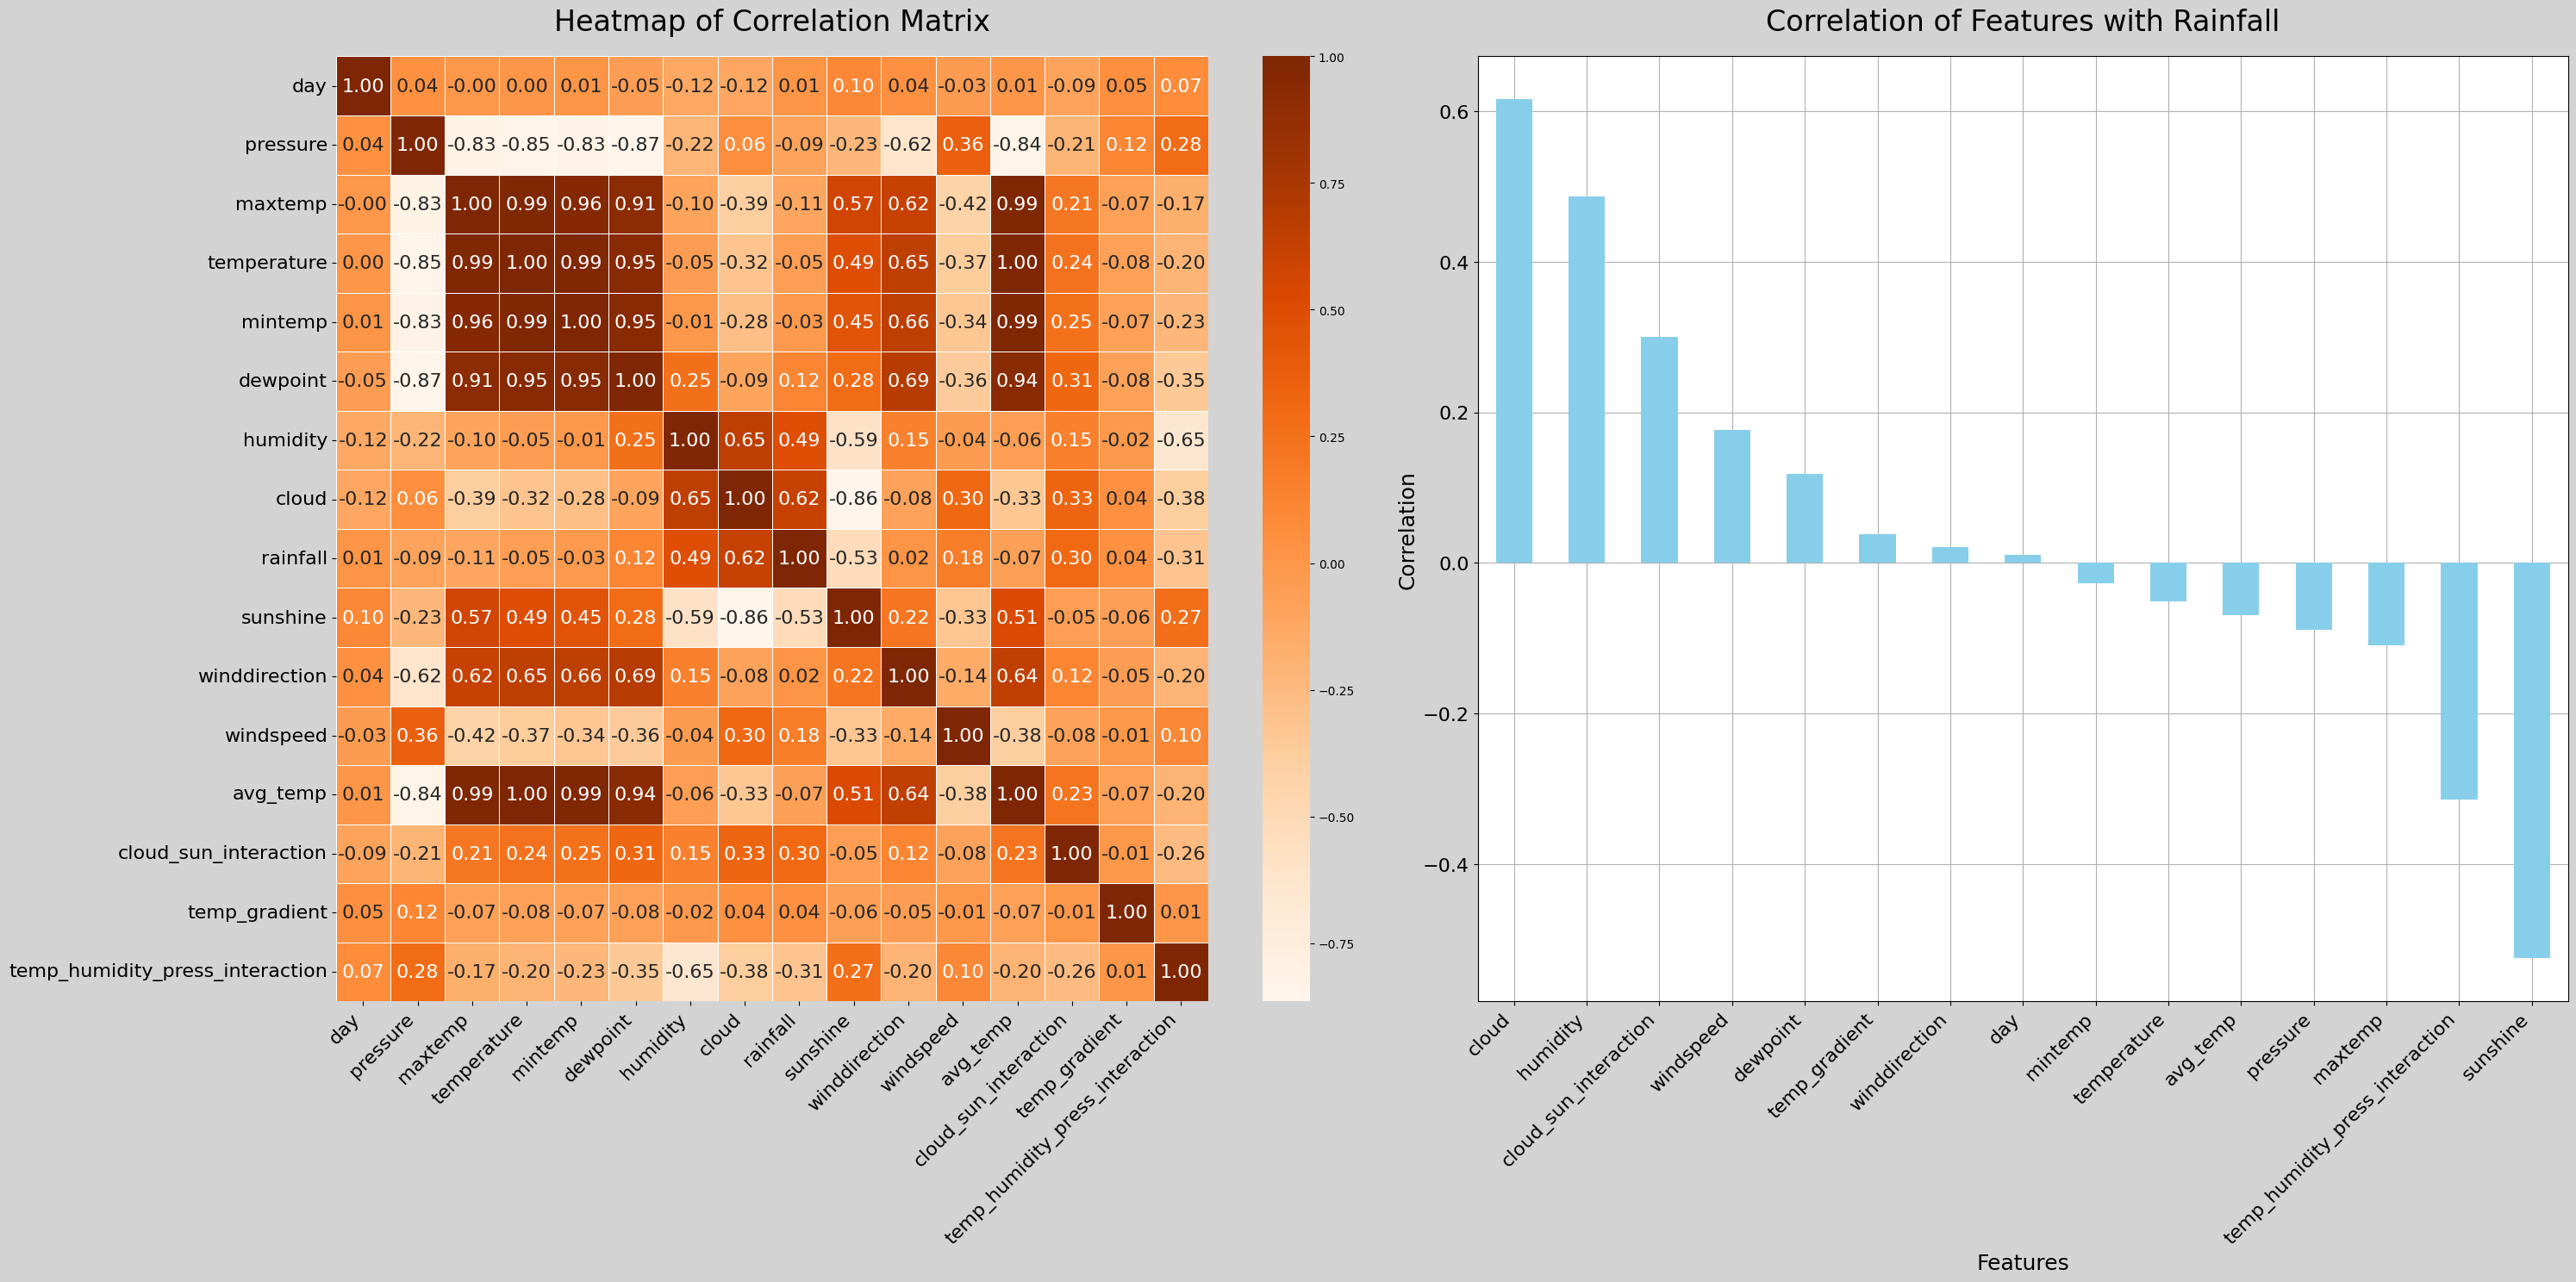

In [39]:
# Plotting heatmap and bar plot of the correlation matrix
plt.figure(figsize=(30, 15), facecolor='lightgray')
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, cmap='Oranges', annot=True, linewidths=0.5, fmt='.2f', annot_kws={"size": 16})
plt.title('Heatmap of Correlation Matrix', fontsize=24, y=1.02)
plt.xticks(fontsize=16, rotation=45, ha='right')  # Increase x-axis label font size
plt.yticks(fontsize=16)  # Increase y-axis label font size

plt.subplot(1, 2, 2)
corr_matrix['rainfall'].sort_values(ascending=False).drop('rainfall').plot(kind='bar', color='skyblue', zorder=2)
plt.title('Correlation of Features with Rainfall', fontsize=24, y=1.02)
plt.xticks(fontsize=16, rotation=45, ha='right')  # Increase x-axis label font size and adjust rotation
plt.yticks(fontsize=16)  # Increase y-axis label font size
plt.xlabel('Features', fontsize=18)  # Increase x-axis label font size
plt.ylabel('Correlation', fontsize=18)  # Increase y-axis label font size
plt.grid(True)

plt.tight_layout()
plt.show()

-> From here we can see that <b>'cloud'</b>, <b>'humidity'</b>, <b>'cloud_sun_interaction'</b>, <b>'windspeed'</b>, <b>'temp_humidity_press_interaction'</b>and <b>'sunshine'</b> are highly correlated with the rainfall feature. All the other features are less correlated with <b>'day'</b> the least correlated feature.

- #### <b>Mutual Information</b>

In [40]:
# Calculating the mutual information with respect to the target variable 'rainfall'
mutual_info = mutual_info_classif(rainfall_dataset.drop('rainfall', axis=1), rainfall_dataset['rainfall'])
mutual_info = pd.DataFrame(mutual_info, index=rainfall_dataset.drop('rainfall', axis=1).columns, columns=['Mutual Information'])
mutual_info.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info

,Mutual Information
sunshine,0.216899
cloud,0.215527
temp_humidity_press_interaction,0.119232
cloud_sun_interaction,0.115297
humidity,0.100534
windspeed,0.049603
temperature,0.023808
temp_gradient,0.014527
winddirection,0.012719
maxtemp,0.009393


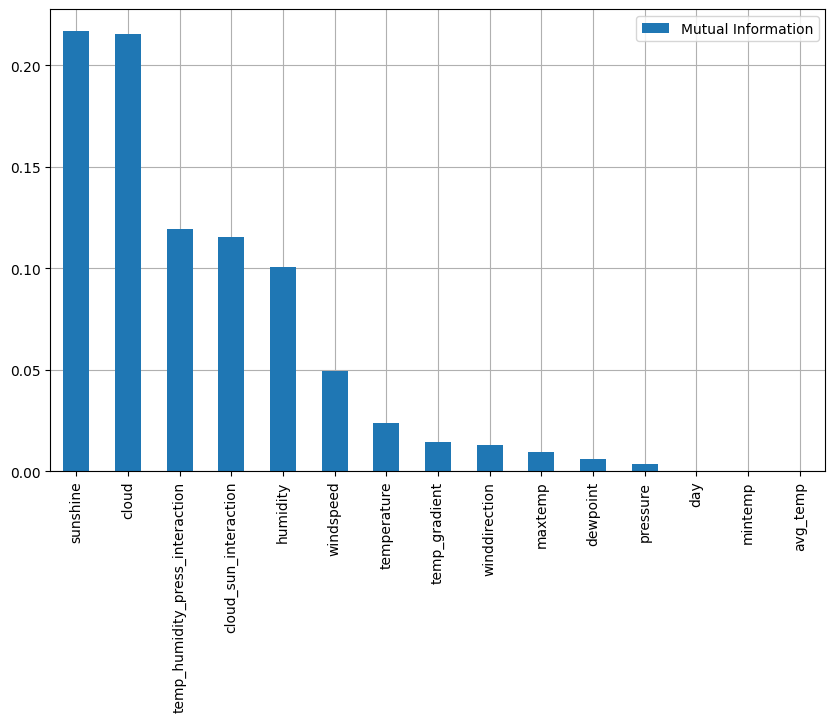

In [41]:
# Plotting bar chart of mutual information for classification
mutual_info.sort_values(by='Mutual Information', ascending=False).plot.bar(figsize=(10, 6), zorder=2)
plt.grid(True)

-> Since the features <b>'day'</b>, <b>avg_temp</b> and <b>'winddireciton'</b> have the least mutual information and also they have the least correlation with the target variable <b>'rainfall'</b> (as can be seen from above heatmap and bar plot), they do not provide much significance in the prediction of rainfall. So these two features can be removed.

In [42]:
# Removing the unnecessary features from the dataset
rainfall_dataset.drop(['day', 'avg_temp' ,'winddirection'], axis=1, inplace=True)

# Checking the shape of the dataset after removing the features
rainfall_dataset.shape

(366, 13)

- <i>So now all the data preprocessing have been completed. Numerical features are standardized and transformed, outliers have been treated, imbalance in the target variable has been balanced and all the anamolies that came during EDA have been handled. Now the dataset is cleaned and is ready for the model training process.</i>

## <u>Data Splitting</u>

In [43]:
# Separating the features and target variable from the dataset after new features have been created.
X = rainfall_dataset.drop('rainfall', axis=1)
Y = rainfall_dataset['rainfall']

print('The shape of features:', X.shape, '\n')
print('The shape of target variable:', Y.shape)

The shape of features: (366, 12) 

The shape of target variable: (366,)


In [44]:
# Splitting the dataset in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Balancing the newly created training set
X_train, Y_train = smote.fit_resample(X_train, Y_train)
print(Y_train.value_counts())

rainfall
0    198
1    198
Name: count, dtype: int64


## <u>Model Training</u>

<i>In this part, 5 different models will be trained namely:
    <li>Logistic Regression</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting Classifier</li>
    <li>Support Vector Classifier (SVC)</li> <br>
    These models will be trained on the training data and will be evaluated mainly on the basis of ROC-AUC score. Then the model with the most score will be selected as best model.
    
</i>

In [45]:
# Training the Logistic Regression model and predicting the target variable
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

lr_Y_pred = lr_model.predict(X_test)
lr_Y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

In [46]:
# Training the Decision Tree Classifier model and predicting the target variable
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

dtc_Y_pred = dtc_model.predict(X_test)
dtc_Y_pred_proba = dtc_model.predict_proba(X_test)[:, 1] 

In [47]:
# Training the Random Forest Classifier model and predicting the target variable
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)

rfc_Y_pred = rfc_model.predict(X_test)
rfc_Y_pred_proba = rfc_model.predict_proba(X_test)[:, 1]

In [48]:
# Training the Gradient Boosting Classifier model and predicting the target variable
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, Y_train)

gbc_Y_pred = gbc_model.predict(X_test)
gbc_Y_pred_proba = gbc_model.predict_proba(X_test)[:, 1]

In [49]:
# Training the Support Vector Classifier model and predicitng the target variable
svc_model = SVC(probability=True)
svc_model.fit(X_train, Y_train)

svc_Y_pred = svc_model.predict(X_test)
svc_Y_pred_proba = svc_model.predict_proba(X_test)[:, 1]

## <u>Model Evalutation</u>

- <i>In this part, these models will be evaluated on the basis of <b>accuracy</b>, <b>precision</b>, <b>recall</b>, <b>f1 score</b> and <b>ROC-AUC score</b>. Then the best model will be selected from above all the models which can predict the rainfall most correctly.</i>

<b>Accuracy</b>: Accuracy measures the proportion of total correct predictions (both positives and negatives) out of all predictions. <br><br>
<b>Precision</b>: Precision measures the proportion of correctly predicted positives out of all predicted positives. It represents the correct predictions out of predicted positives. <br><br>
<b>Recall</b>: Recall measures the proportion of actual positives that were correctly predicted. It represents the correct predictions out of actual correct predictions. <br><br>
<b>F1 score</b>:  F1-Score is the harmonic mean of precision and recall. It balances the two metrics, making it a good indicator of model performance. <br><br>
<b>ROC-AUC score</b>: ROC-AUC score is often used as a measure of model performance as it takes into account both the True Positive Rate and False Positive Rate. It represents the area under the ROC curve. Greater the ROC-AUC score, better is the model's performance. <br><br>

In [50]:
# Calculating accuracies of the models
lr_accuracy_score = accuracy_score(Y_test, lr_Y_pred)
dtc_accuracy_score = accuracy_score(Y_test, dtc_Y_pred)
rfc_accuracy_score = accuracy_score(Y_test, rfc_Y_pred)
gbc_accuracy_score = accuracy_score(Y_test, gbc_Y_pred)
svc_accuracy_score = accuracy_score(Y_test, svc_Y_pred)

In [51]:

# Calculating precisions of the models
lr_precision_score = precision_score(Y_test, lr_Y_pred)
dtc_precision_score = precision_score(Y_test, dtc_Y_pred)
rfc_precision_score = precision_score(Y_test, rfc_Y_pred)
gbc_precision_score = precision_score(Y_test, gbc_Y_pred)
svc_precision_score = precision_score(Y_test, svc_Y_pred)

In [52]:
# Calculating recalls of the models
lr_recall_score = recall_score(Y_test, lr_Y_pred)
dtc_recall_score = recall_score(Y_test, dtc_Y_pred)
rfc_recall_score = recall_score(Y_test, rfc_Y_pred)
gbc_recall_score = recall_score(Y_test, gbc_Y_pred)
svc_recall_score = recall_score(Y_test, svc_Y_pred)

In [53]:
# Calculating F1 scores of the models
lr_f1_score = f1_score(Y_test, lr_Y_pred)
dtc_f1_score = f1_score(Y_test, dtc_Y_pred)
rfc_f1_score = f1_score(Y_test, rfc_Y_pred)
gbc_f1_score = f1_score(Y_test, gbc_Y_pred)
svc_f1_score = f1_score(Y_test, svc_Y_pred)

In [54]:
# Calculating the ROC-AUC score of the models
lr_roc_auc_score = roc_auc_score(Y_test, lr_Y_pred_proba)
dtc_roc_auc_score = roc_auc_score(Y_test, dtc_Y_pred_proba)
rfc_roc_auc_score = roc_auc_score(Y_test, rfc_Y_pred_proba)
gbc_roc_auc_score = roc_auc_score(Y_test, gbc_Y_pred_proba)
svc_roc_auc_score = roc_auc_score(Y_test, svc_Y_pred_proba)

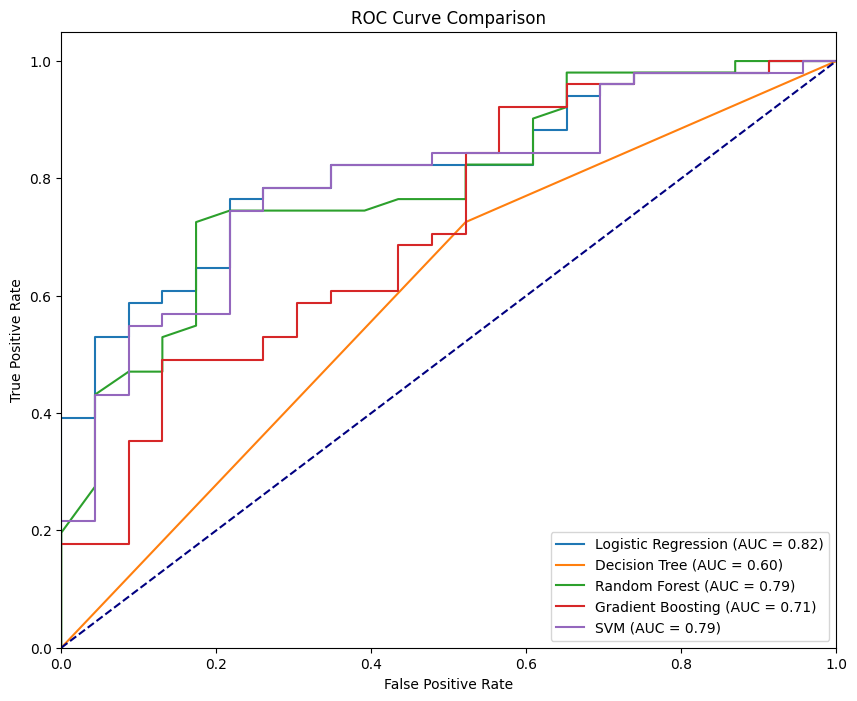

In [55]:
# Plotting the ROC curve for the models
# Initialize your models
models_pred_proba = {
    'Logistic Regression': lr_Y_pred_proba,
    'Decision Tree': dtc_Y_pred_proba,
    'Random Forest': rfc_Y_pred_proba,
    'Gradient Boosting': gbc_Y_pred_proba,
    'SVM': svc_Y_pred_proba
}

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for model_name, probability in models_pred_proba.items():
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, probability)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show plot
plt.show()

In [56]:
evaluation_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [lr_accuracy_score, dtc_accuracy_score, rfc_accuracy_score, gbc_accuracy_score, svc_accuracy_score],
    'Precision': [lr_precision_score, dtc_precision_score, rfc_precision_score, gbc_precision_score, svc_precision_score],
    'Recall': [lr_recall_score, dtc_recall_score, rfc_recall_score, gbc_recall_score, svc_recall_score],
    'F1': [lr_f1_score, dtc_f1_score, rfc_f1_score, gbc_f1_score, svc_f1_score],
    'Area Under ROC curve': [lr_roc_auc_score, dtc_roc_auc_score, rfc_roc_auc_score, gbc_roc_auc_score, svc_roc_auc_score]
}

# Create DataFrame
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)
evaluation_metrics_df

,Model,Accuracy,Precision,Recall,F1,Area Under ROC curve
0,Logistic Regression,0.743243,0.807692,0.823529,0.815534,0.815004
1,Decision Tree,0.648649,0.755102,0.725490,0.740000,0.601876
2,Random Forest,0.716216,0.777778,0.823529,0.800000,0.789429
3,Gradient Boosting,0.716216,0.767857,0.843137,0.803738,0.714408
4,SVM,0.716216,0.767857,0.843137,0.803738,0.791134


- <i><b>Logistic Regression</b> has the best F1 score, precision, and AUC-ROC, indicating strong overall performance and a good balance between precision and recall. Its accuracy is also the highest among the models.</i><br><br>
- <i><b>Decision Tree</b> model has the lowest accuracy and AUC-ROC, suggesting it might be underperforming in terms of generalization and ROC curve performance. It has moderate precision and recall.</i><br><br>
- <i><b>Random Forest</b> performs well with a balance of high recall and precision. Its AUC-ROC is also strong, though slightly lower than Logistic Regression. Its overall performance is solid.</i><br><br>
- <i><b>Gradient Boosting</b> has the second-best recall and F1 score but the lowest AUC-ROC. It performs well overall but could benefit from better ROC curve performance.</i><br><br>
- <i><b>SVM</b> has the highest recall and a strong F1 score, with good precision. Its AUC-ROC is competitive, though not the highest.</i>

<h2><b>Conclusion</b></h2>
<p><li><b>Logistic Regression</b> stands out as the best-performing model due to its highest precision, recall, F1 score, and AUC-ROC. It can mainly due to the reason that it is a linear model which is less prone to overfitting and it is also a simple model.</li></p>
<p><li><b>Decision Tree</b> performs the worst among the other models. It has the lowest accuracy and the lowest AUC-ROC. This suggests that the Decision Tree does not generalize well and has poorer performance in distinguishing between classes compared to the other models. Its precision, recall, and F1 score are also relatively lower suggesting that it might has overfit to the training data and is performing poorer on the test data.</li></p>
<p><li><b>Random Forest</b>, <b>Gradient Boosting</b> and <b>Support Vector</b> also performs very well due to their ability of ensemble learning and training a strong learner. They can also be a good choice for predicting rainfall.</li></p>

In [57]:
# Saving the models in pickle files
jb.dump(lr_model, 'Models/logistic_regression.pkl')
jb.dump(dtc_model, 'Models/decision_tree.pkl')
jb.dump(rfc_model, 'Models/random_forest.pkl')
jb.dump(gbc_model, 'Models/gradient_boosting.pkl')
jb.dump(svc_model, 'Models/svc.pkl')

['Models/svc.pkl']

<hr>